#  Build a Model that Classifies the Side Effects of a Drug

In this internship, I am going to build a classification model that effectively classifies the side effects of a drug

The dataset is taken from Kaggle. The link to the dataset is : https://www.kaggle.com/datasets/rohanharode07/webmd-drug-reviews-dataset

# Importing the necessary libraries

In [1]:
#Loading the dataset
import numpy as np
import pandas as pd
#Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset using Pandas

In [2]:
data = pd.read_csv('webmd.csv')

In [3]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


## Adding two extra columns : race and name

In [4]:
#Adding race column
from faker import Faker
import pandas as pd

fake = Faker()

race_list = [fake.random_element(["Asian", "Black", "White", "Hispanic", "Native American"]) for _ in range(362806)]

df = pd.DataFrame({'Race': race_list})

In [5]:
#Adding name column
from faker import Faker
import pandas as pd

fake = Faker()

name_list = [fake.name() for _ in range(362806)]

df1 = pd.DataFrame({'Name': name_list})


In [6]:
#Concatenating the two new columns to a single variable
df_nr = pd.concat([df1, df], axis=1).reindex(df.index)

In [7]:
#Concatenating the two new columns with the original dataset
new_df = pd.concat([df_nr,data], axis=1).reindex(data.index)

In [8]:
new_df.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Philip Bailey,Native American,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Kevin Gomez,White,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Nicole Hansen,White,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Jessica Bennett,Asian,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Katie Cline,Native American,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


# Description of the Features

The dataset contains the following columns:


1. Name(Categorical): Name of the patient
2. Race(Categorical): Race of the patient
3. Age(numerical): Age group range of user
4. Condition(categorical): Name of the condition
5. Date(date): Date of review entry
6. Drug(categorical): Name of the Drug
7. Drugid(numerical): Drug id
8. Ease of Use(numerical): 5 star rating
9. Effectiveness(numerical): 5 star rating
10. Reviews(text): Patient Review
11. Satisfaction(numerical): 5 star rating
12. Sex(categorical): Gender of user
13. Sides(text): Side effects of the drug
14. Useful Count(numerical): Number of Users who found the review to be useful



# About the Dataset

In [9]:
#Number of rows and columns
new_df.shape

(362806, 14)

There are 362806 rows and 12 columns.

In [10]:
#Name of the Columns
new_df.columns

Index(['Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'DrugId',
       'EaseofUse', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [11]:
#Data type of the columns
new_df.dtypes

Name             object
Race             object
Age              object
Condition        object
Date             object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

In [12]:
#Statistical description of the data
new_df.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [13]:
#Information of the data
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Name           362806 non-null  object
 1   Race           362806 non-null  object
 2   Age            362806 non-null  object
 3   Condition      362806 non-null  object
 4   Date           362806 non-null  object
 5   Drug           362806 non-null  object
 6   DrugId         362806 non-null  int64 
 7   EaseofUse      362806 non-null  int64 
 8   Effectiveness  362806 non-null  int64 
 9   Reviews        362769 non-null  object
 10  Satisfaction   362806 non-null  int64 
 11  Sex            362806 non-null  object
 12  Sides          362806 non-null  object
 13  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 38.8+ MB


Unique Values of each column

In [14]:
new_df['Name'].unique()

array(['Philip Bailey', 'Kevin Gomez', 'Nicole Hansen', ...,
       'Latasha Daniel', 'Terry Carpenter', 'Brittany Tapia'],
      dtype=object)

In [15]:
new_df['Race'].unique()

array(['Native American', 'White', 'Asian', 'Black', 'Hispanic'],
      dtype=object)

In [16]:
new_df['Age'].unique()

array(['75 or over', '25-34', '65-74', '35-44', '55-64', '45-54', '19-24',
       ' ', '13-18', '7-12', '0-2', '3-6'], dtype=object)

In [17]:
new_df['Condition'].unique()

array(['Stuffy Nose', 'Cold Symptoms', 'Other', ...,
       'Combative and Explosive Behavior', 'Lead Poisoning',
       'Poisoning from Swallowed Unknown Substance'], dtype=object)

In [18]:
new_df['Date'].unique()

array(['9/21/2014', '1/13/2011', '7/16/2012', ..., '10/25/2019',
       '6/22/2019', '10/19/2019'], dtype=object)

In [19]:
new_df['Drug'].unique()

array(['25dph-7.5peh', 'warfarin (bulk) 100 % powder', 'wymzya fe', ...,
       'chest congestion relief dm', 'chantix', 'chateal'], dtype=object)

In [20]:
new_df['DrugId'].unique()

array([146724, 144731, 163180, ...,  94947, 144470, 163265], dtype=int64)

In [21]:
new_df['EaseofUse'].unique()

array([ 5,  2,  1,  4,  3,  6, 10], dtype=int64)

In [22]:
new_df['Effectiveness'].unique()

array([ 5,  3,  2,  1,  4,  6, 10], dtype=int64)

In [23]:
new_df['Reviews'].unique()

array(["I'm a retired physician and of all the meds I have tried for my allergies (seasonal and not) - this one is the most effective for me.  When I first began using this drug some years ago - tiredness as a problem but is not currently.",
       'cleared me right up even with my throat hurting it went away after taking the medicine',
       'why did my PTINR go from a normal of 2.5 to over \n100?', ...,
       "As long as I was on chantix, I didn't smoke.  Terrible stomach upset after each dose, constipation, headaches constantly, crazy dreams and mood swings.  I have had to stop taking it and have found other ways to stop smoking.",
       "Started this medication Oct 5th 2008. Haven't smoked for 6 weeks and planning on the full 12 weeks program.  I have had some problems like getting sick after the meds but accually it helps because everytime I see a smoker or smell smoke I get sick, still want one but it offsets it.",
       "One year ago, I tried Chantix and had to stop taking i

In [24]:
new_df['Satisfaction'].unique()

array([ 5,  3,  1,  4,  2,  6, 10], dtype=int64)

In [25]:
new_df['Sex'].unique()

array(['Male', 'Female', ' '], dtype=object)

In [26]:
new_df['Sides'].unique()

array(['Drowsiness,  dizziness ,  dry mouth /nose/throat,  headache ,  upset stomach ,  constipation , or  trouble sleeping  may occur.',
       ' ',
       'Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.',
       ...,
       'Drowsiness,  dizziness ,  nausea ,  constipation ,  blurred vision , or  headache  may occur.',
       'Drowsiness,  dizziness ,  dry mouth ,  blurred vision ,  constipation ,  bloating , trouble urinating, and  weight  gain may occur.',
       'Diarrhea ,  nausea , or  heartburn  may occur.'], dtype=object)

In [27]:
new_df['UsefulCount'].unique()

array([  0,   1,   3,  10,   5,   4,   2,   7,   6,  12,  15,   9,  14,
        13,  18,  29,  17,   8,  30,  20,  16,  25,  19,  11,  23,  38,
        44,  34,  35,  21,  42,  28,  36,  40,  60,  48,  61,  50,  43,
        26,  22,  41,  54,  24,  33,  27,  45,  59,  75,  77,  66,  31,
        47,  32,  90,  84,  39,  55, 137,  53,  56,  65,  46,  37,  74,
        49,  63,  57,  71,  51,  67, 105,  58,  62,  52,  70, 113,  83,
       140,  88, 100, 107,  79,  96,  72,  97,  64,  87,  76,  68, 131,
       101,  69, 108, 154,  81, 109, 112,  82, 136,  80, 117, 103,  86,
        73,  92, 133,  85, 119, 141, 123,  78,  89,  91, 135, 110, 169,
       176, 178, 126,  94, 127,  99, 104, 255,  98, 106, 134, 121, 111,
       102, 114, 120, 156, 222, 129, 166, 142, 125, 115,  93, 132, 122,
       128, 188, 145, 116,  95], dtype=int64)

In [28]:
print('Name:',new_df['Name'].nunique())
print('Race:',new_df['Race'].nunique())
print('Age:',new_df['Age'].nunique())
print('Condition:',new_df['Condition'].nunique())
print('Date:',new_df['Date'].nunique())
print('Drug:',new_df['Drug'].nunique())
print('DrugId:',new_df['DrugId'].nunique())
print('EaseofUse:',new_df['EaseofUse'].nunique())
print('Effectiveness:',new_df['Effectiveness'].nunique())
print('Reviews:',new_df['Reviews'].nunique())
print('Satisfaction:',new_df['Satisfaction'].nunique())
print('Sex:',new_df['Sex'].nunique())
print('Sides:',new_df['Sides'].nunique())
print('UsefulCount:',new_df['UsefulCount'].nunique())

Name: 180451
Race: 5
Age: 12
Condition: 1806
Date: 4524
Drug: 7093
DrugId: 6572
EaseofUse: 7
Effectiveness: 7
Reviews: 250167
Satisfaction: 7
Sex: 3
Sides: 1651
UsefulCount: 148


# Exploratory Data Analysis(EDA)

In [29]:
#Checking null values
new_df.isnull().sum()

Name              0
Race              0
Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

The Column review has 37 missing values.

In [30]:
new_df['Drug'].value_counts()

cymbalta                               4648
lisinopril                             4269
lisinopril solution                    4269
lexapro                                4134
hydrocodone-acetaminophen              3944
                                       ... 
sorbsan bandage                           1
sorbsan topical wound dressing 3" x       1
q-pap extra strength                      1
symax                                     1
vanadium granules                         1
Name: Drug, Length: 7093, dtype: int64

Text(0.5, 1.0, 'Top 15 Drugs')

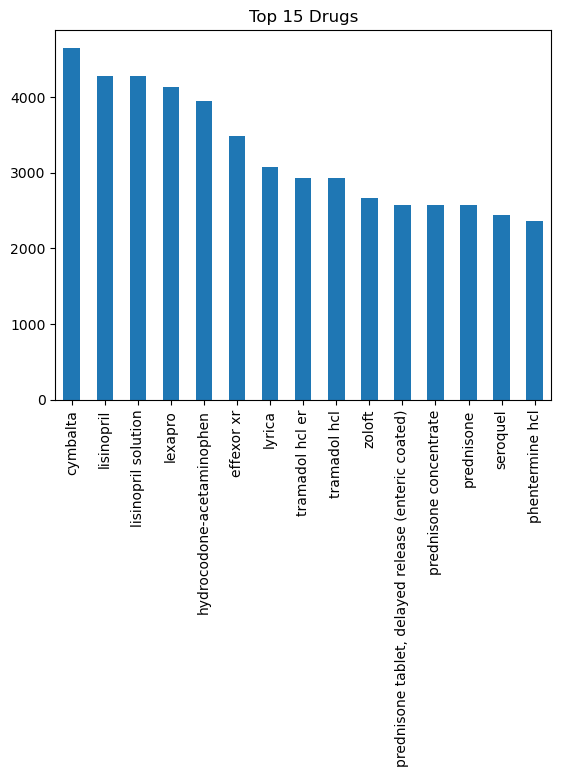

In [31]:
new_df['Drug'].value_counts().head(15).plot(kind = 'bar')
plt.title('Top 15 Drugs')

# Drugs used by each Age Groups

AGE: 75 or over

In [32]:
df=new_df.groupby(['Age'])

In [33]:
df1=df.get_group('75 or over')

In [34]:
df1['Drug'].value_counts()

lisinopril solution                                     331
lisinopril                                              331
prednisone                                              167
plavix                                                  167
prednisone concentrate                                  167
                                                       ... 
nexium                                                    1
nexavar                                                   1
nevanac suspension, drops (final dose form)               1
neutrogena t/sal 3 % shampoo keratolytics (shampoos)      1
chantix                                                   1
Name: Drug, Length: 2242, dtype: int64

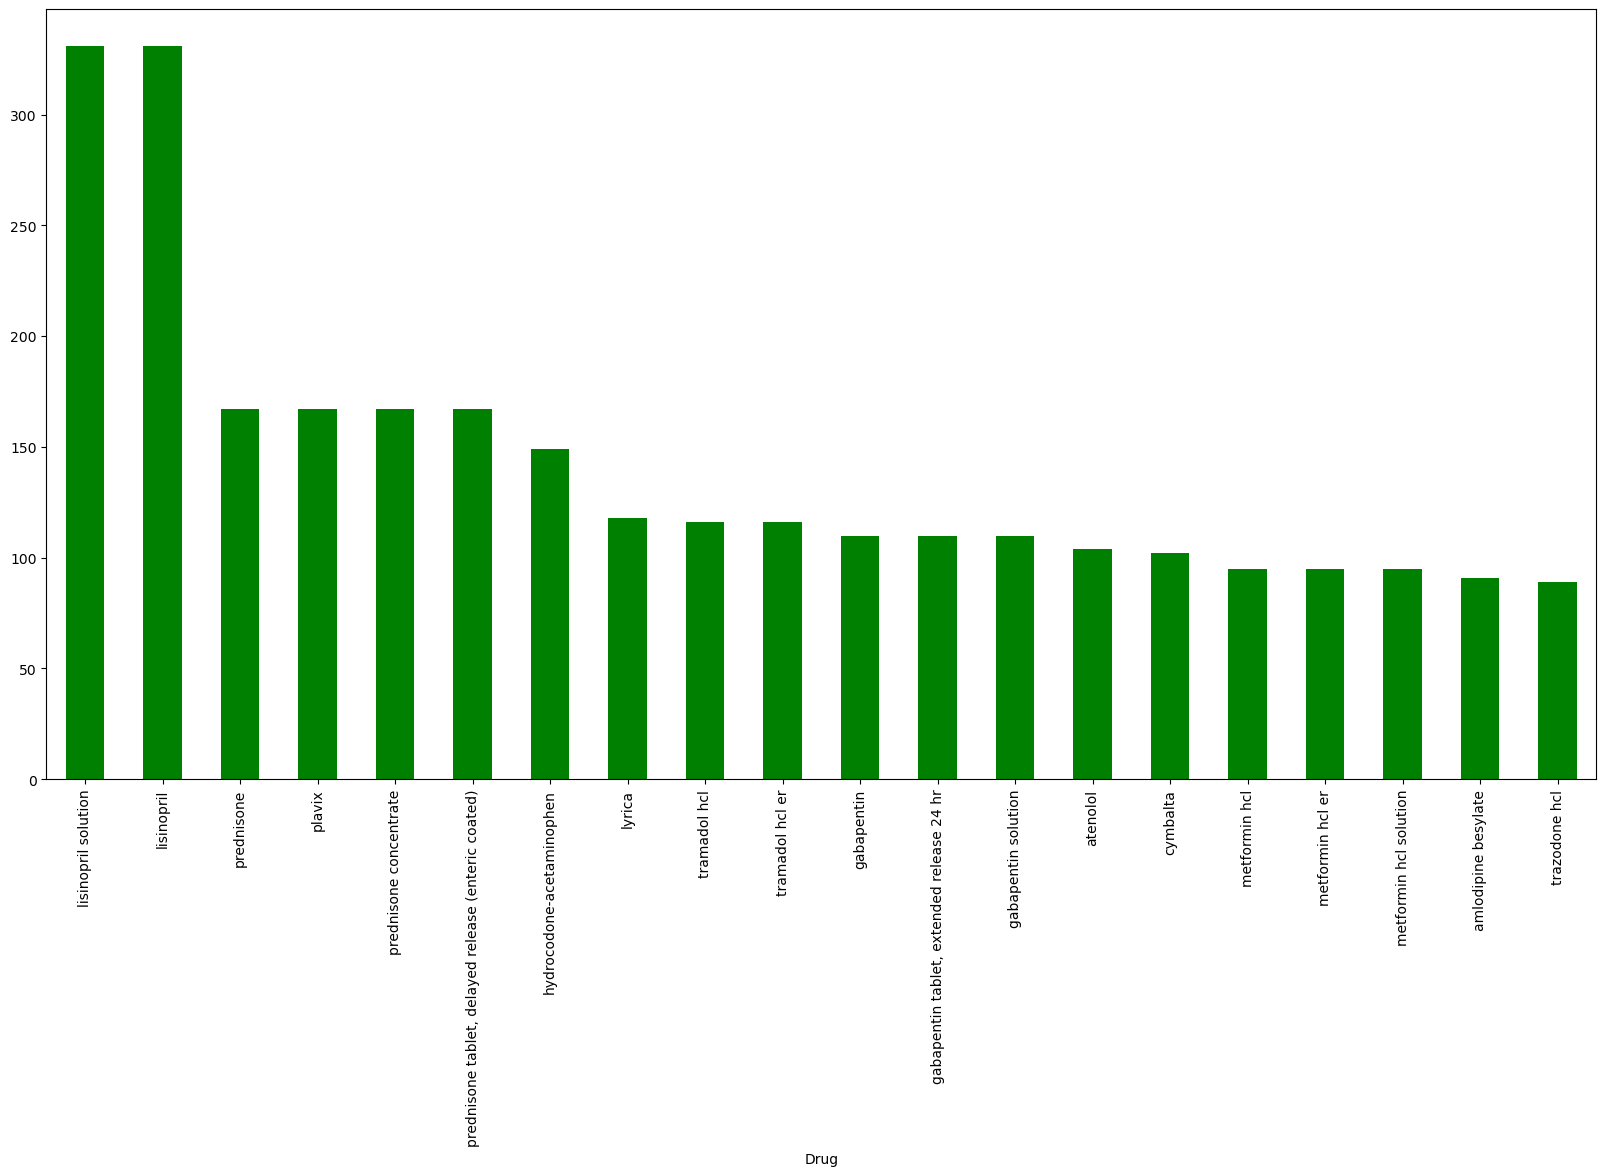

In [35]:
plt.subplots(figsize=(20,10))
df1['Drug'].value_counts().head(20).plot(kind='bar',color = 'Green')
plt.xlabel('Drug')
plt.show()

Drug mostly used by age group 75 or over is lisinopril solution  

AGE: 65-74

In [36]:
df2=df.get_group('65-74')

In [37]:
df2['Drug'].value_counts()

lisinopril solution                766
lisinopril                         766
hydrocodone-acetaminophen          412
prednisone concentrate             402
prednisone                         402
                                  ... 
guaiatussin ac                       1
ginkgo                               1
pamidronate disodium vial            1
guaifenesin (bulk) 100 % powder      1
warfarin (bulk) 100 % powder         1
Name: Drug, Length: 3467, dtype: int64

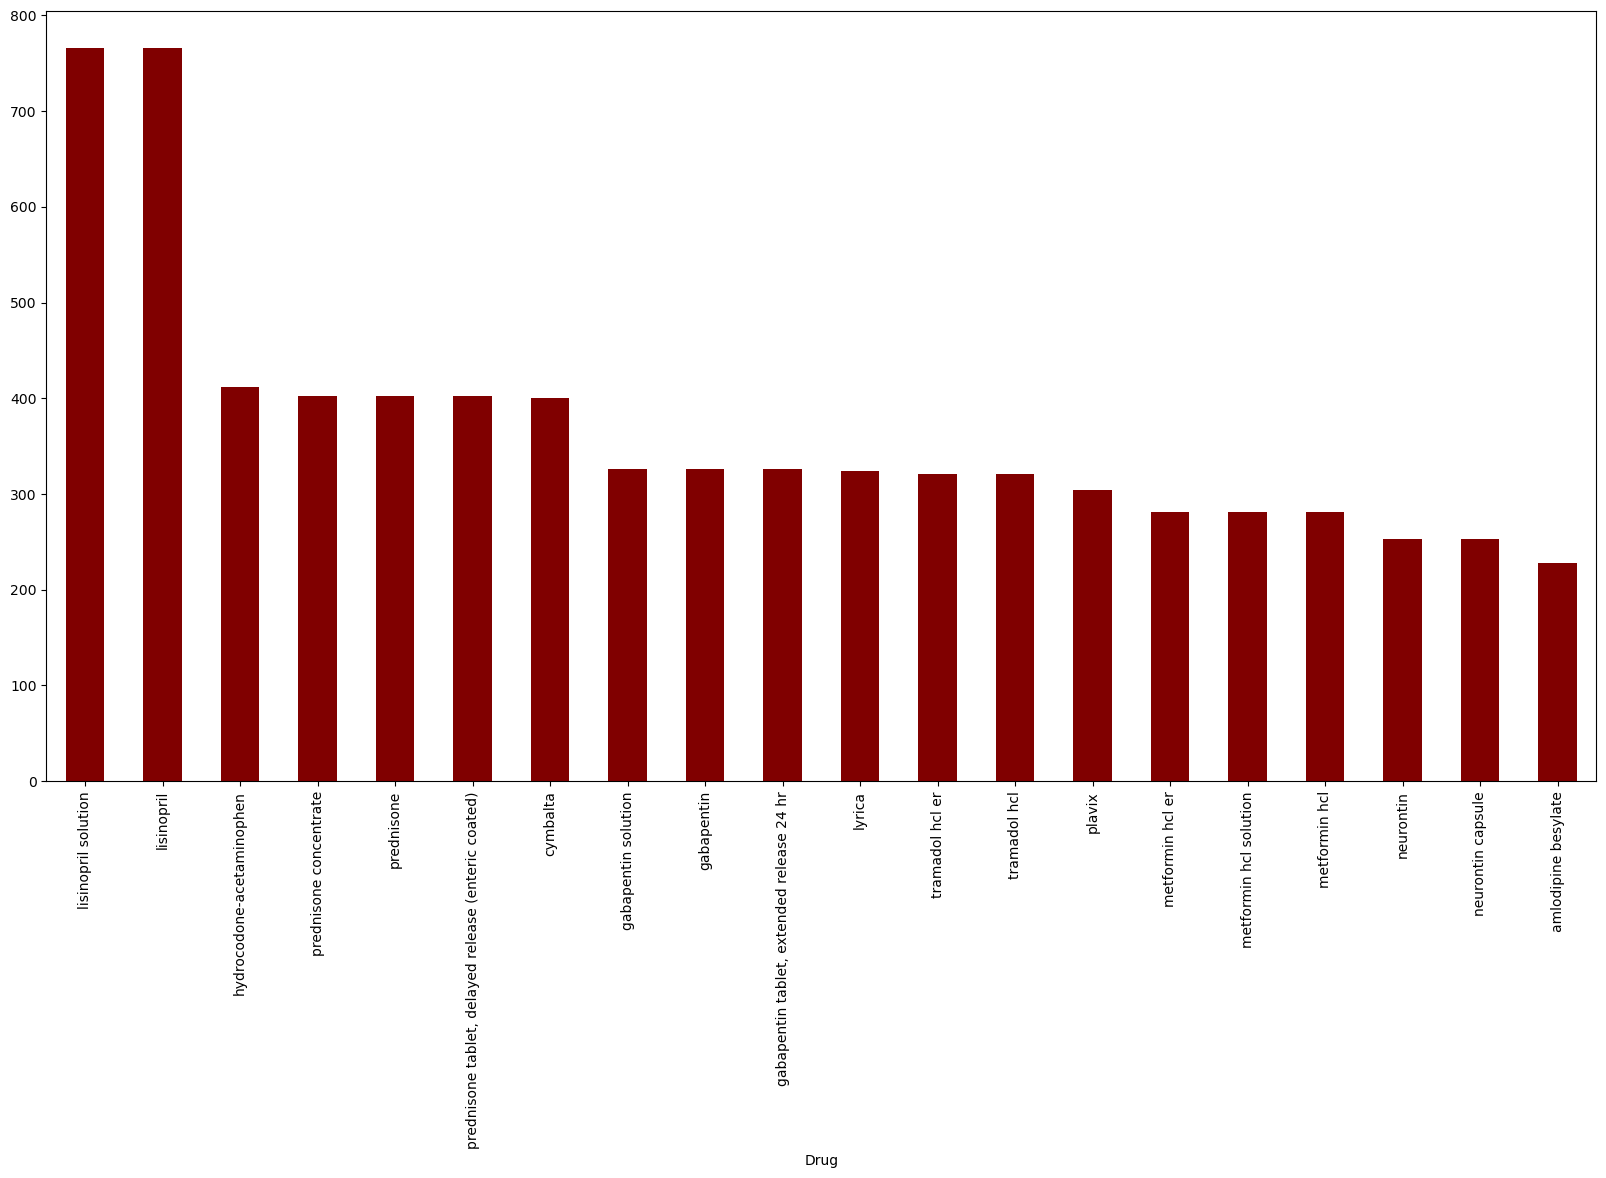

In [38]:
plt.subplots(figsize=(20,10))
df2['Drug'].value_counts().head(20).plot(kind='bar',color='maroon')
plt.xlabel('Drug')
plt.show()

Drug mostly used by age group 65-74 is lisinopril solution

AGE: 55-64

In [39]:
df3=df.get_group('55-64')

In [40]:
df3['Drug'].value_counts()

lisinopril solution                                 1191
lisinopril                                          1191
cymbalta                                            1008
hydrocodone-acetaminophen                            831
lyrica                                               816
                                                    ... 
vancomycin-d5w solution, piggyback premix frozen       1
vandetanib tablet                                      1
vascazen                                               1
vasoflex hd                                            1
vogelxo gel                                            1
Name: Drug, Length: 4125, dtype: int64

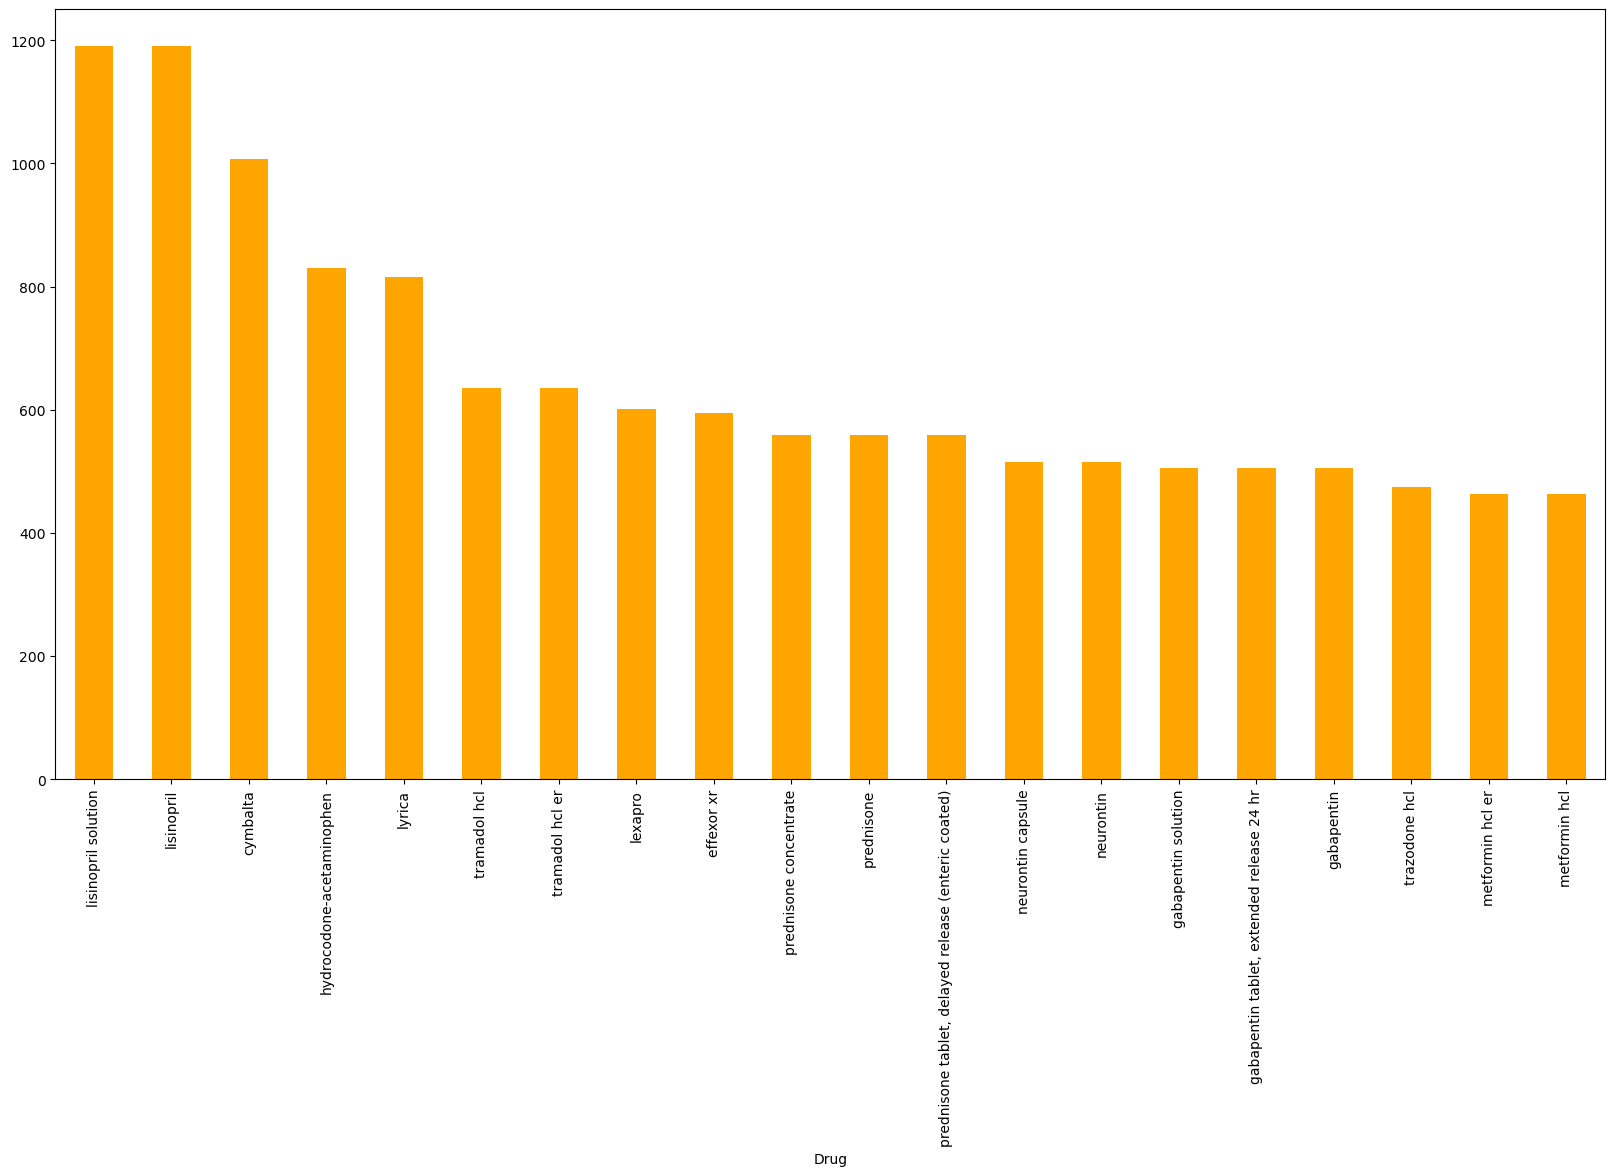

In [41]:
plt.subplots(figsize=(20,10))
df3['Drug'].value_counts().head(20).plot(kind='bar',color='orange')
plt.xlabel('Drug')
plt.show()

Drug mostly used by age group 55-64 is lisinopril solution

AGE: 45-54 

In [42]:
df4=df.get_group('45-54')

In [43]:
df4['Drug'].value_counts()

cymbalta                                       1291
lisinopril solution                            1111
lisinopril                                     1111
hydrocodone-acetaminophen                       960
lyrica                                          884
                                               ... 
varubi                                            1
vaseretic                                         1
vagistat-3 kit                                    1
vagisil towelette                                 1
urea lotion keratolytics (topical), general       1
Name: Drug, Length: 4123, dtype: int64

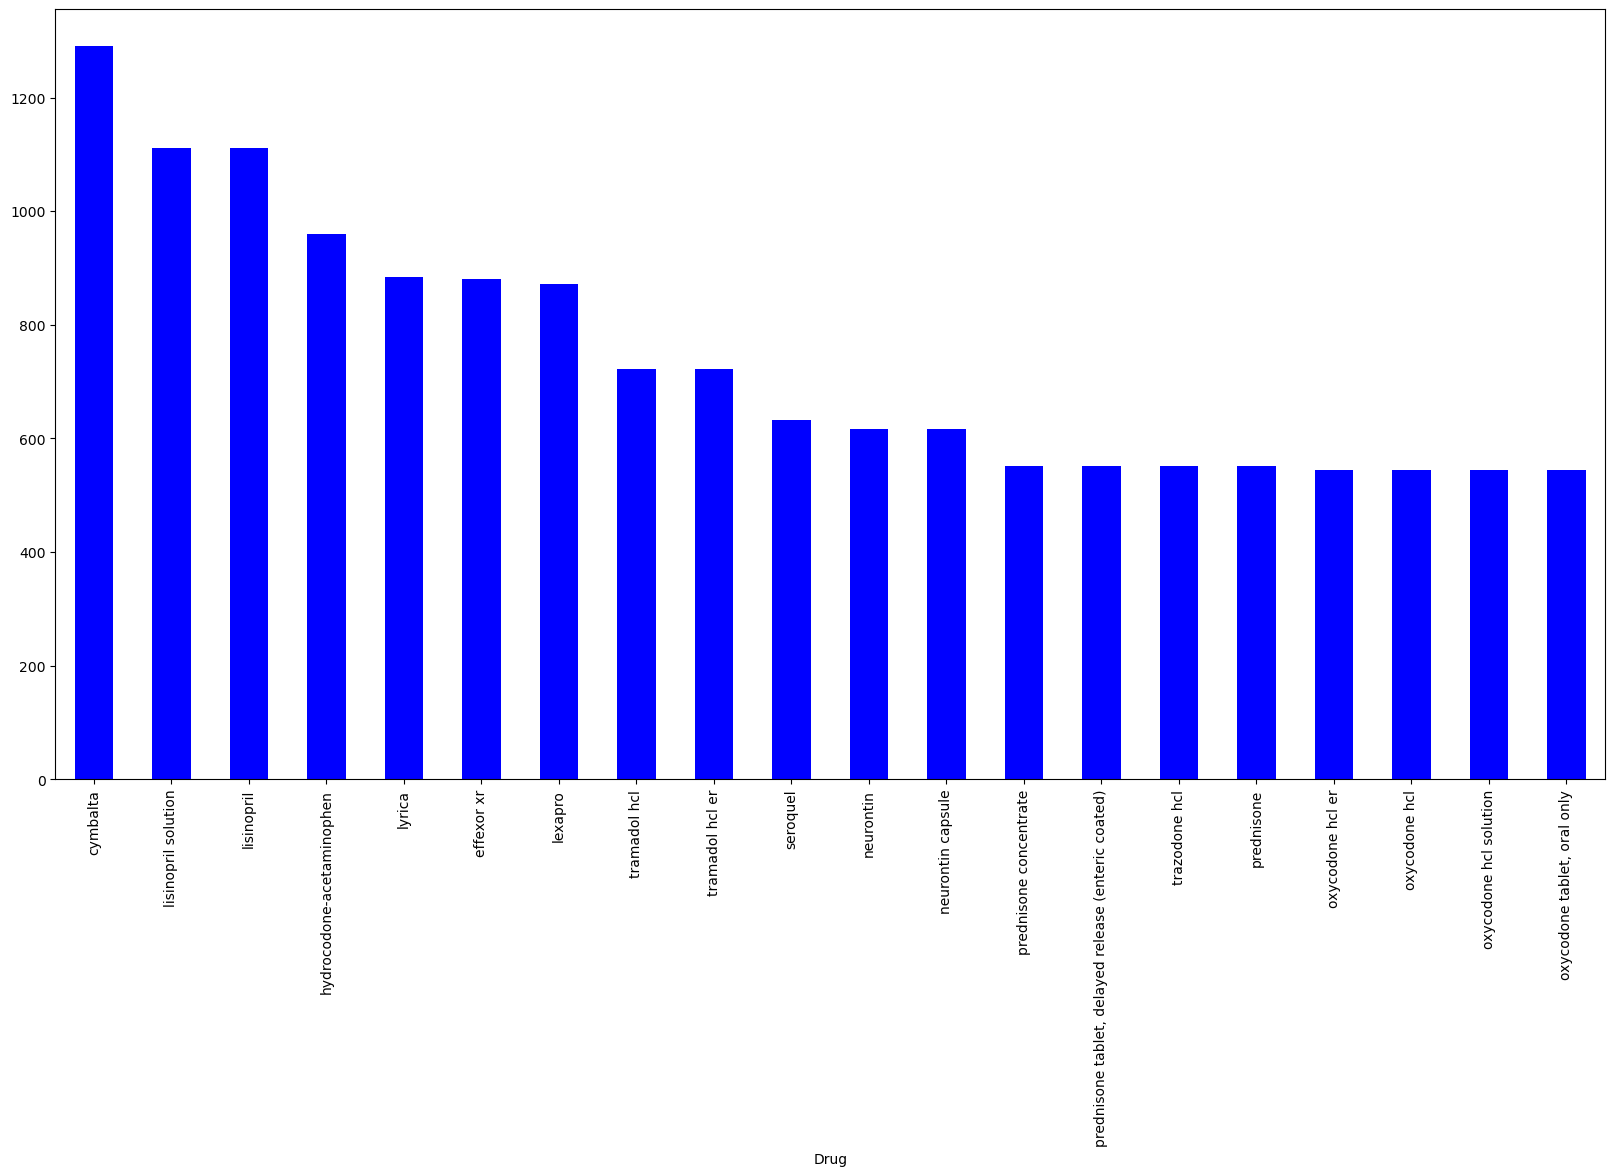

In [44]:
plt.subplots(figsize=(20,10))
df4['Drug'].value_counts().head(20).plot(kind='bar',color='blue')
plt.xlabel('Drug')
plt.show()

Drug mostly used by age group 45-54 is cymbalta

AGE: 35-44

In [45]:
df5=df.get_group('35-44')

In [46]:
df5['Drug'].value_counts()

cymbalta                                       874
lexapro                                        809
effexor xr                                     693
hydrocodone-acetaminophen                      690
phentermine hcl                                629
                                              ... 
sleep aid tablet                                 1
ferric ammonium citrate (bulk) 100 % powder      1
ferrogels forte                                  1
ferrous fum-vit c-vit b12-fa capsule             1
warfarin (bulk) 100 % powder                     1
Name: Drug, Length: 3670, dtype: int64

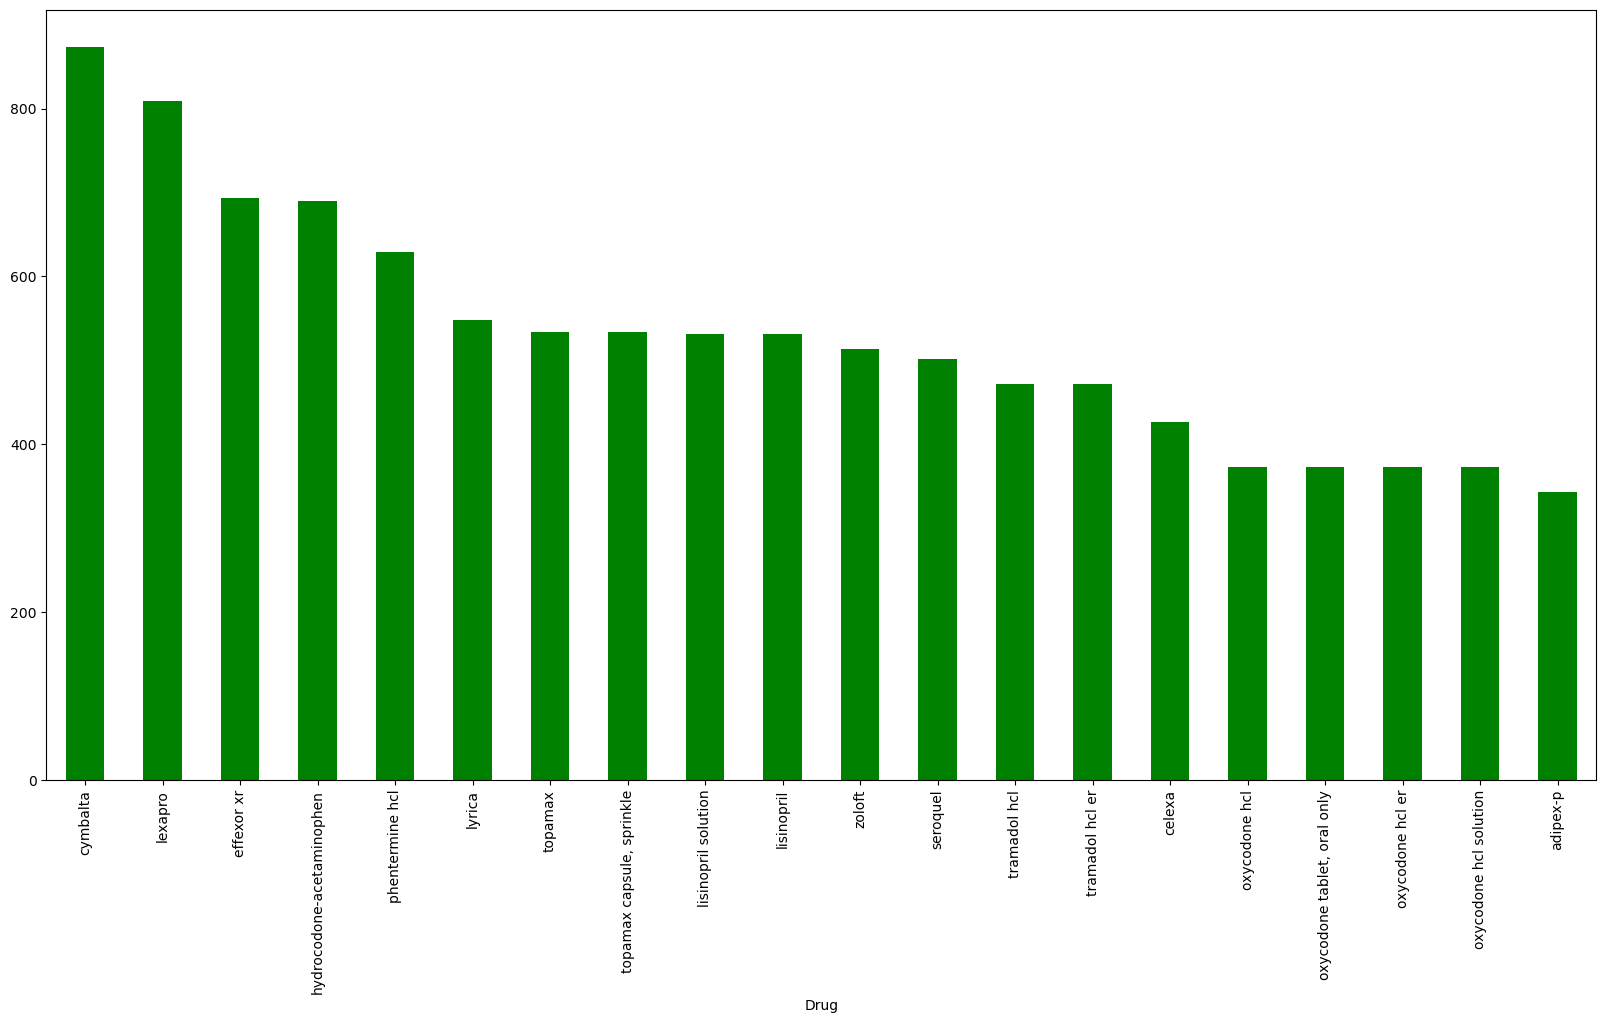

In [47]:
plt.subplots(figsize=(20,10))
df5['Drug'].value_counts().head(20).plot(kind='bar',color='green')
plt.xlabel('Drug')
plt.show()

Drug mostly used by age group 35-44 is cymbalta

AGE: 25-34

In [48]:
df6=df.get_group('25-34')

In [49]:
df6['Drug'].value_counts()

lexapro                          846
mirena intrauterine device       829
phentermine hcl                  795
effexor xr                       674
cymbalta                         594
                                ... 
axitinib tablet                    1
ayr saline spray, non-aerosol      1
vicks dayquil-nyquil cold-flu      1
vicks dayquil mucus control        1
urea cream emollients              1
Name: Drug, Length: 3338, dtype: int64

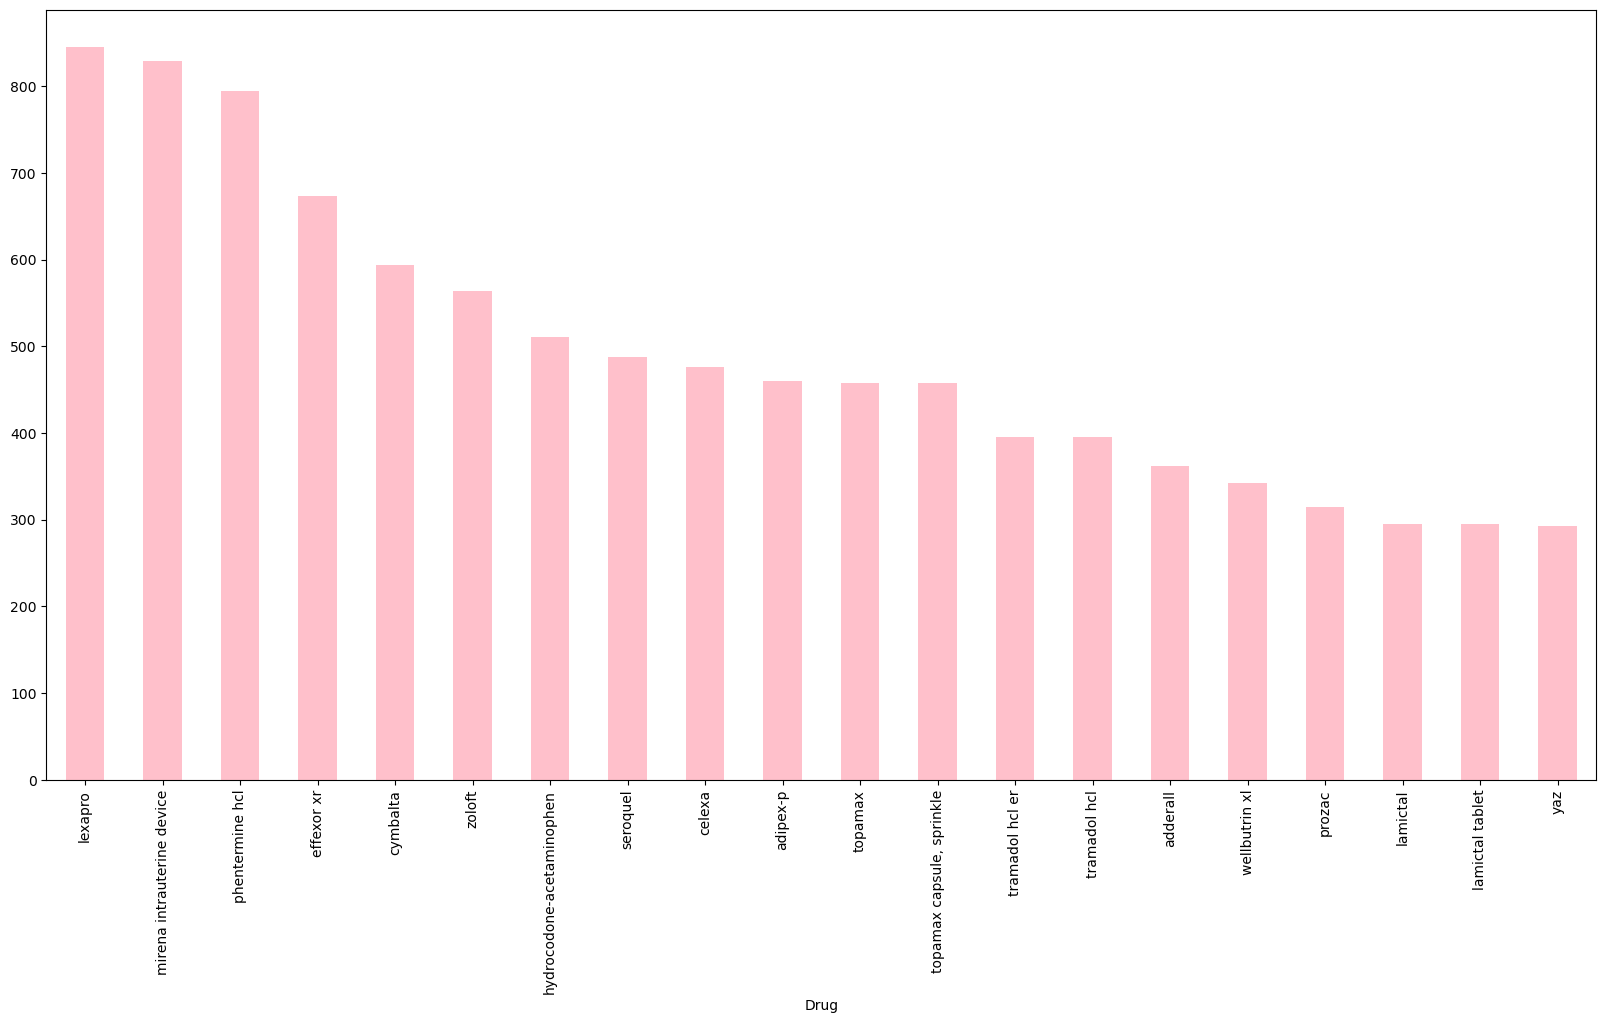

In [50]:
plt.subplots(figsize=(20,10))
df6['Drug'].value_counts().head(20).plot(kind='bar',color='pink')
plt.xlabel('Drug')
plt.show()

Drug mostly used by age group 25-34 is lexapro

AGE: 19-24

In [51]:
df7=df.get_group('19-24')

In [52]:
df7['Drug'].value_counts()

mirena intrauterine device                                  457
sprintec                                                    424
lexapro                                                     393
zoloft                                                      289
tri-sprintec                                                262
                                                           ... 
aspirin tablet                                                1
aspirin capsule, extended release 24 hr (capsule, er hr)      1
aspirin                                                       1
aricept                                                       1
gyne-lotrimin-7 cream with applicator                         1
Name: Drug, Length: 2187, dtype: int64

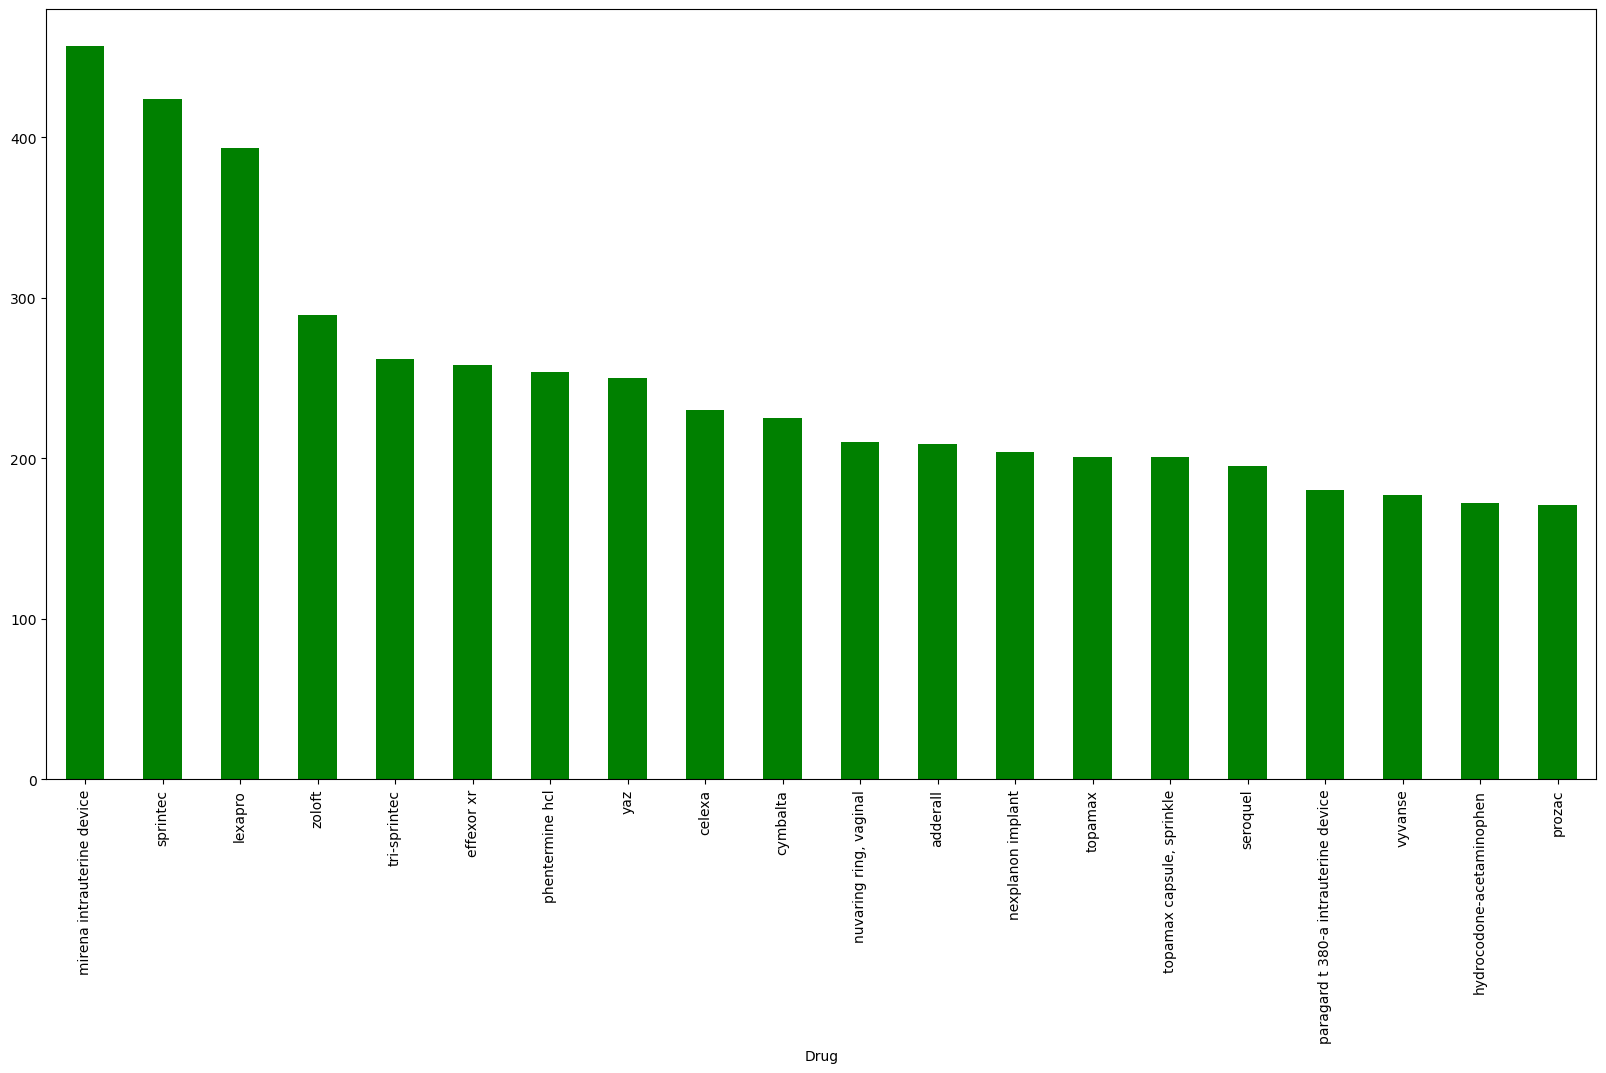

In [53]:
plt.subplots(figsize=(20,10))
df7['Drug'].value_counts().head(20).plot(kind='bar',color='Green')
plt.xlabel('Drug')
plt.show()

Drug mostly used by age group 19-24 is mirena intrauterine device

AGE: 13-18

In [54]:
df8=df.get_group('13-18')

In [55]:
df8['Drug'].value_counts()

lexapro                       155
vyvanse                       152
zoloft                        147
concerta                      141
sprintec                      133
                             ... 
tranylcypromine sulfate         1
tranexamic acid                 1
tramadol hcl-acetaminophen      1
tylenol extra strength          1
taclonex ointment               1
Name: Drug, Length: 1280, dtype: int64

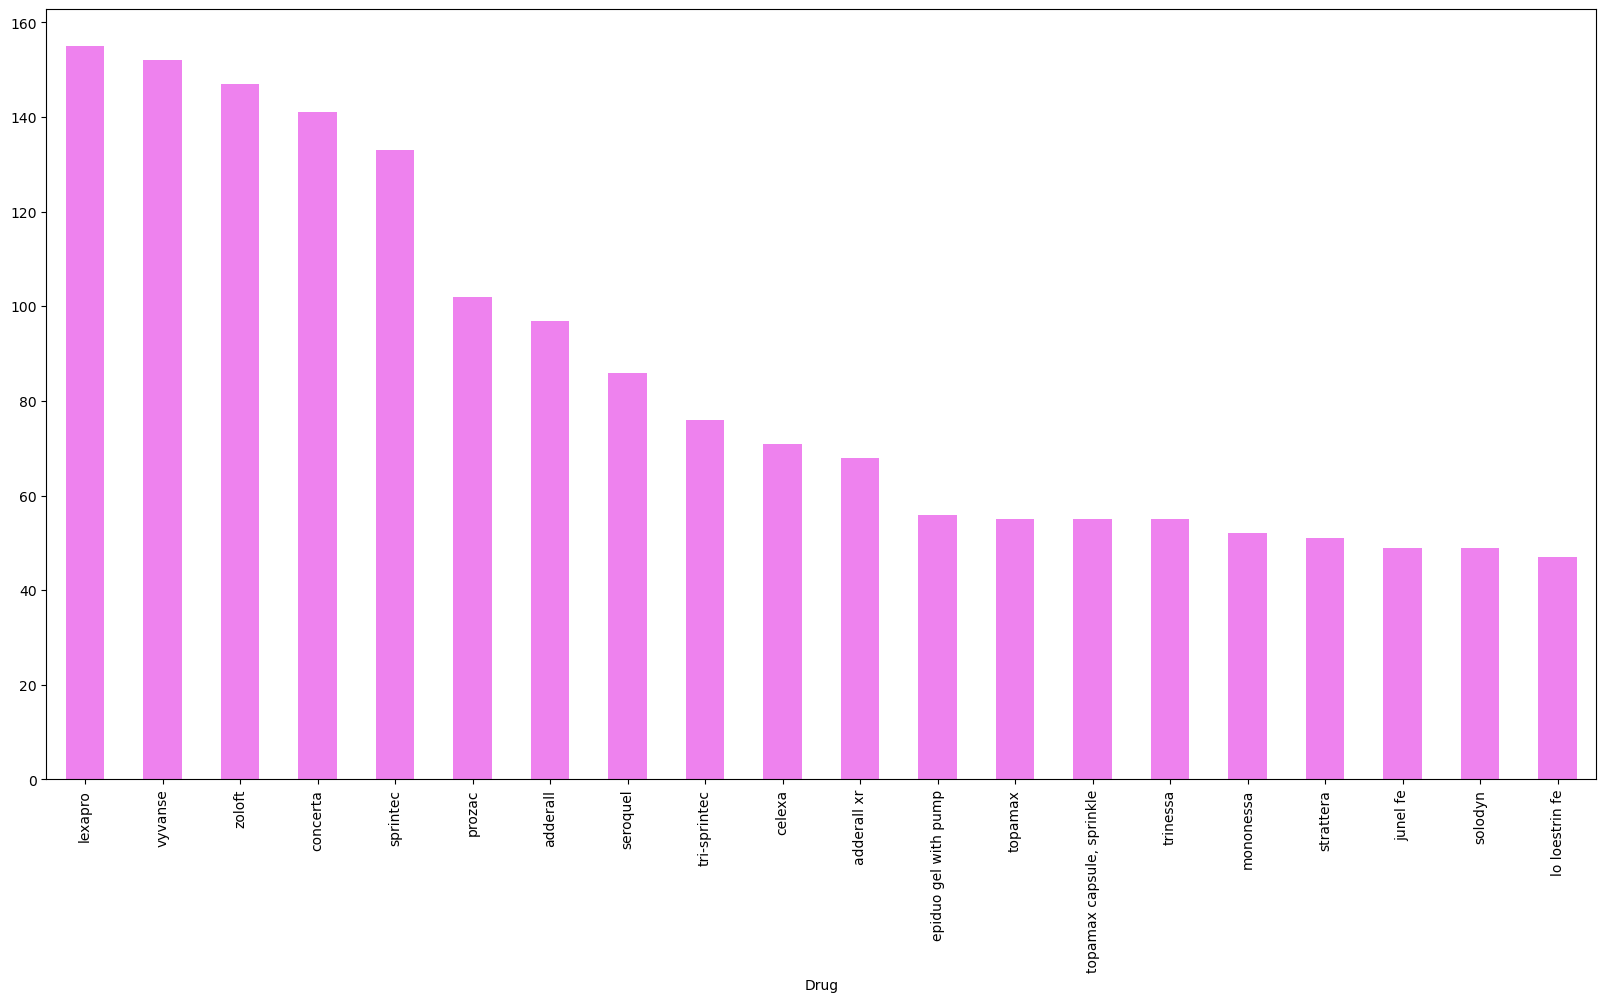

In [56]:
plt.subplots(figsize=(20,10))
df8['Drug'].value_counts().head(20).plot(kind='bar',color='violet')
plt.xlabel('Drug')
plt.show()

Drug mostly used by age group 13-18 is lexapro

AGE: 7-12

In [57]:
df9=df.get_group('7-12')

In [58]:
df9['Drug'].value_counts()

vyvanse                          146
concerta                          97
focalin xr                        61
intuniv                           45
adderall xr                       41
                                ... 
sprycel                            1
sodium fluoride                    1
sulfasalazine dr                   1
sulfamethoxazole-trimethoprim      1
children's allegra allergy         1
Name: Drug, Length: 462, dtype: int64

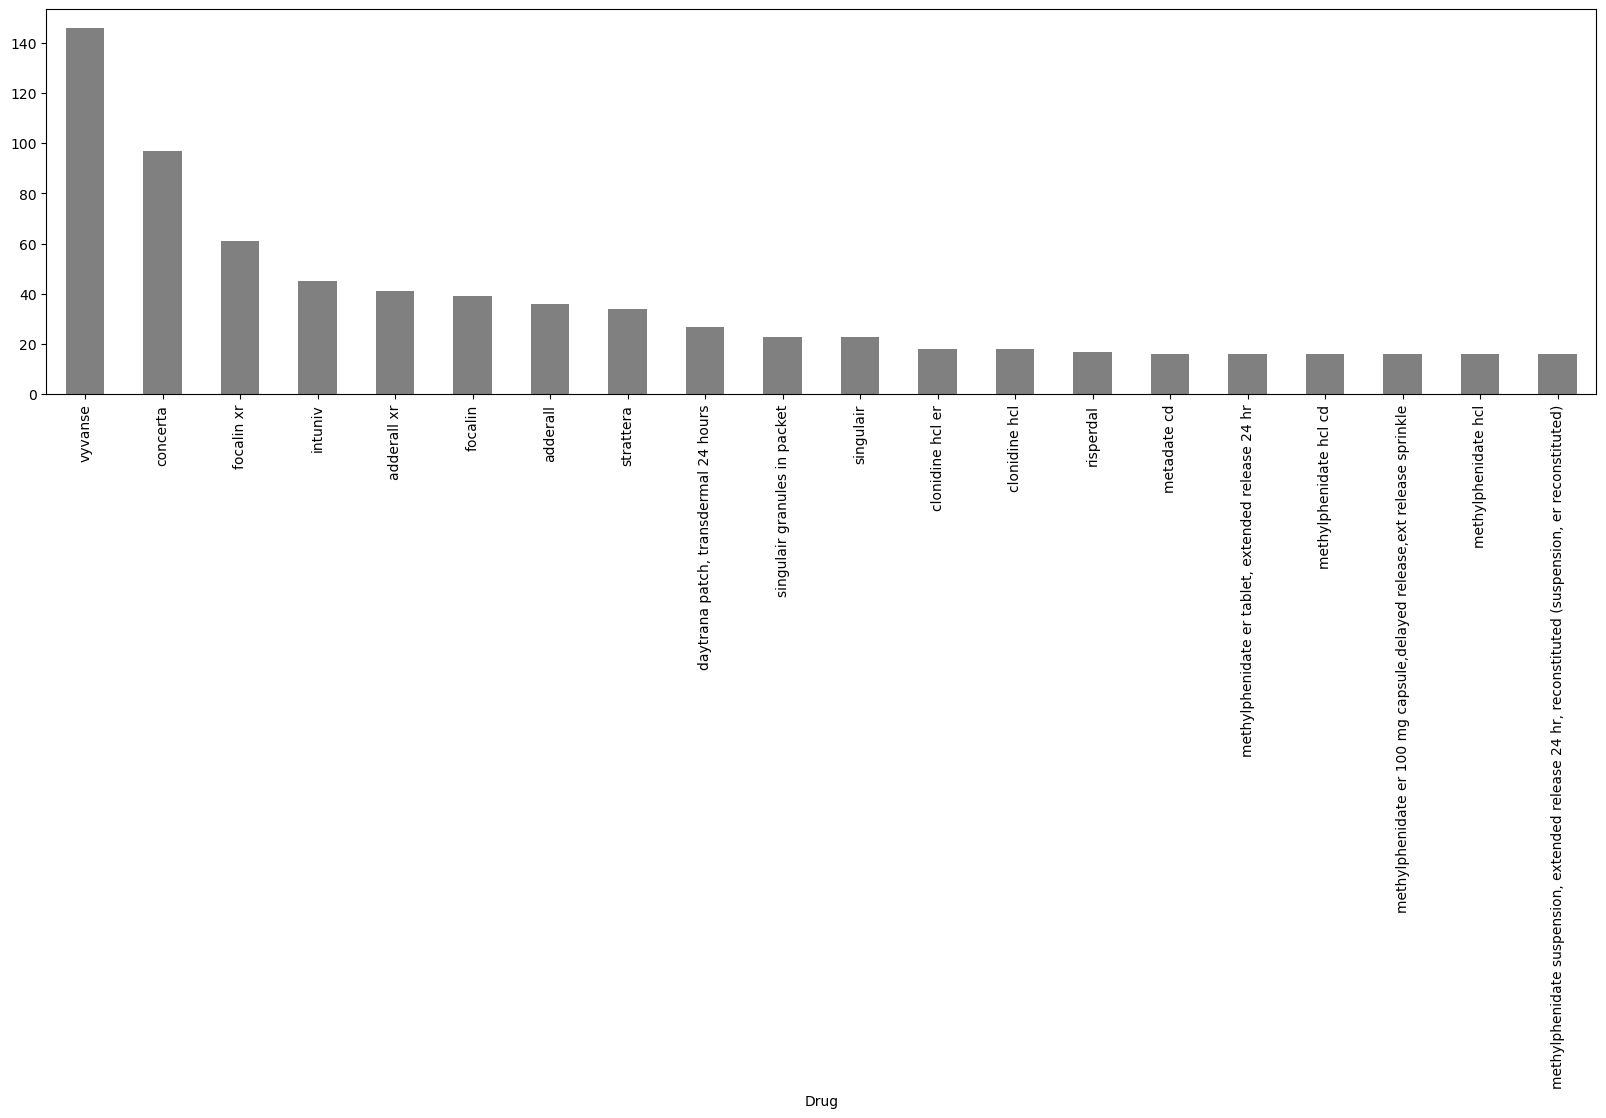

In [59]:
plt.subplots(figsize=(20,5))
df9['Drug'].value_counts().head(20).plot(kind='bar',color='grey')
plt.xlabel('Drug')
plt.show()

 Drug mostly used by age group 7-12 is vyvanse 

AGE: 3-6

In [60]:
df10=df.get_group('3-6')

In [61]:
df10['Drug'].value_counts()

vyvanse                         50
adderall                        27
singulair granules in packet    25
singulair                       25
risperdal                       23
                                ..
xyzal                            1
xeljanz                          1
xeljanz xr                       1
vasoflex forte                   1
allergy relief tablet            1
Name: Drug, Length: 325, dtype: int64

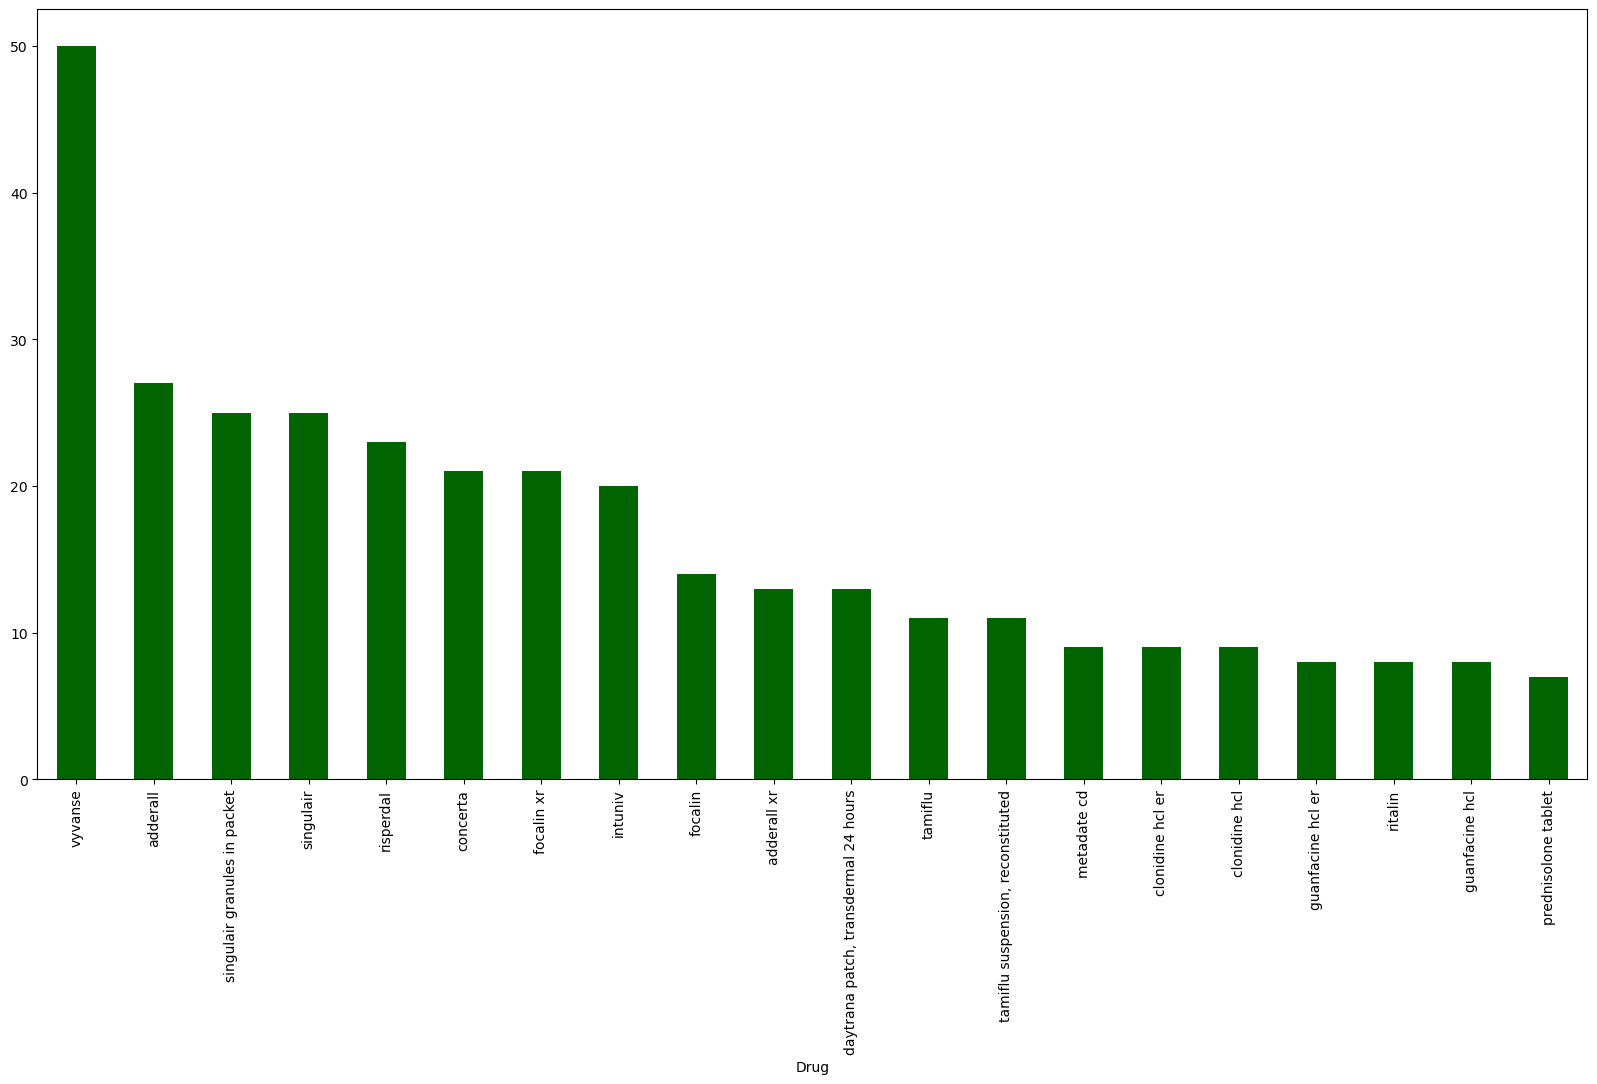

In [62]:
plt.subplots(figsize=(20,10))
df10['Drug'].value_counts().head(20).plot(kind='bar',color='darkgreen')
plt.xlabel('Drug')
plt.show()

Drug mostly used by age group 3-6 is vyvanse

AGE: 0-2

In [63]:
df11=df.get_group('0-2')

In [64]:
df11['Drug'].value_counts()

cefdinir                        14
cefdinir capsule                14
keppra                          10
amoxicillin tablet, chewable     9
amoxicillin                      9
                                ..
zovirax cream                    1
zovirax                          1
zithromax                        1
scalp relief liquid              1
veripred 20                      1
Name: Drug, Length: 278, dtype: int64

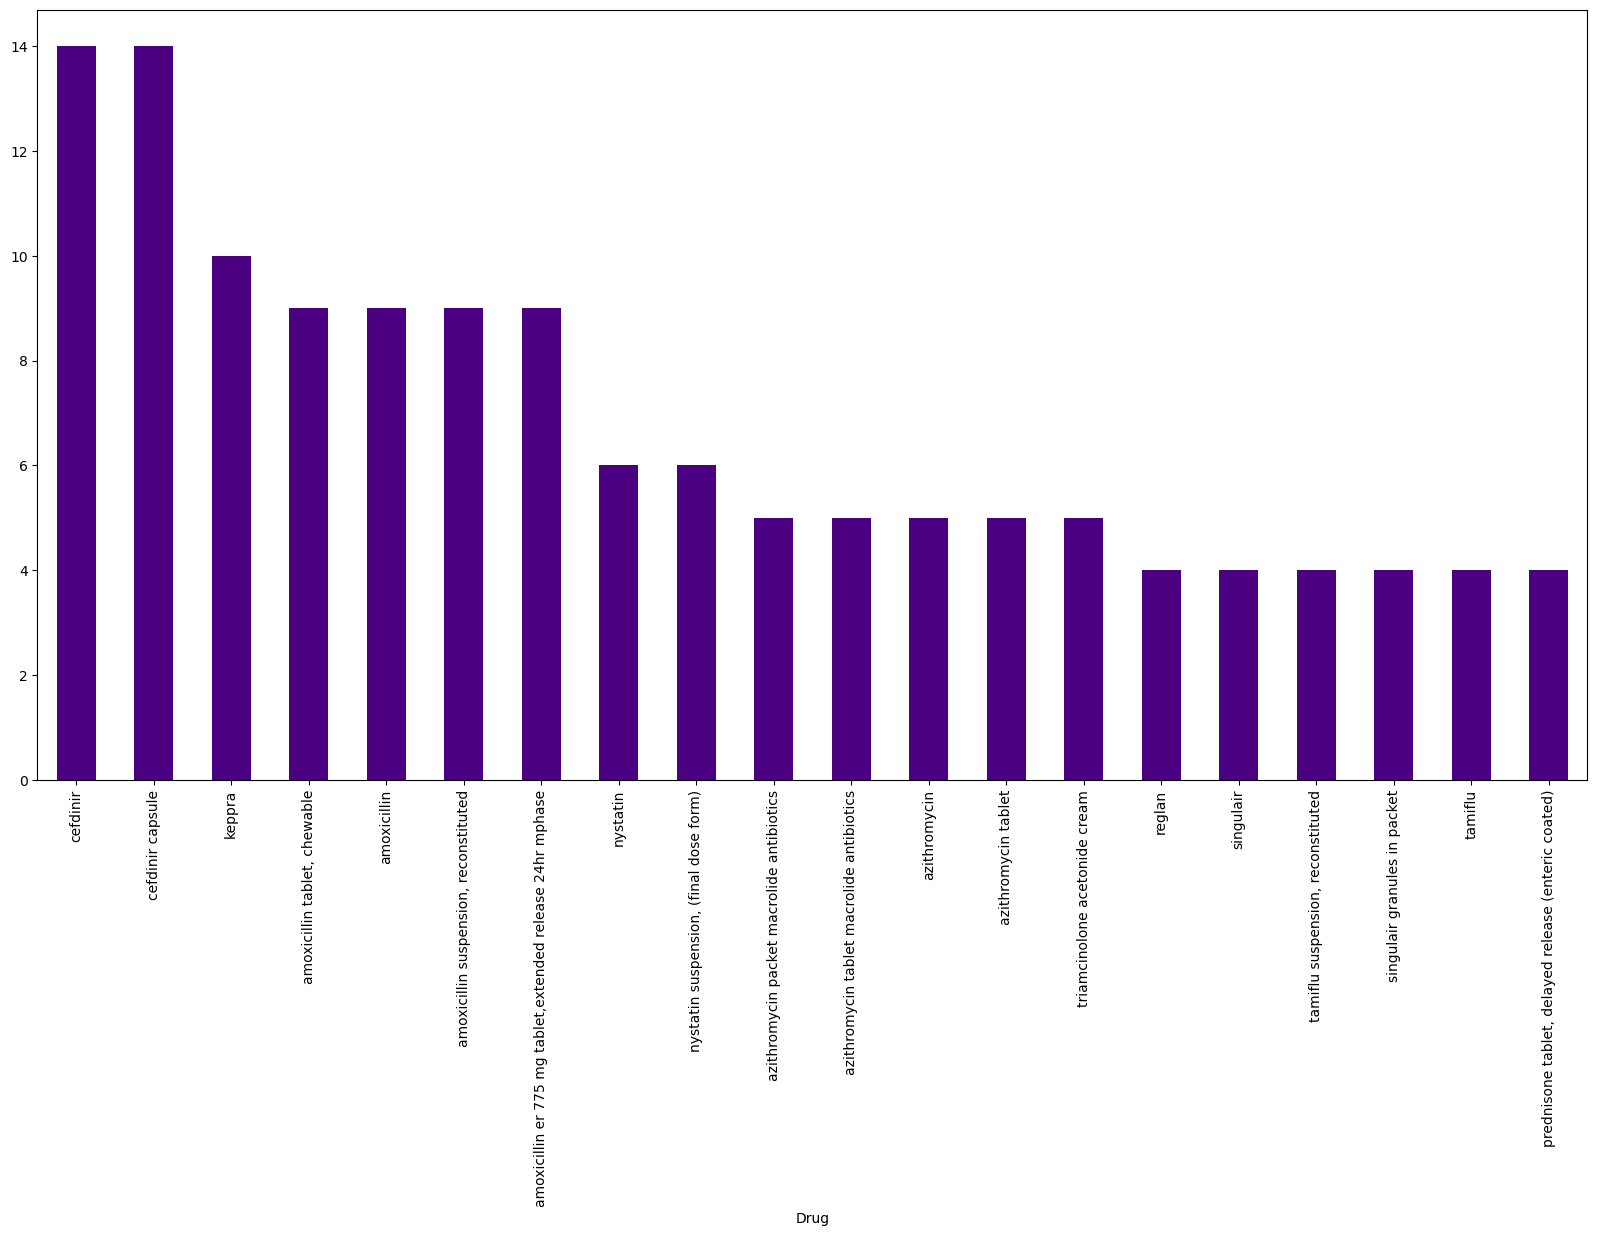

In [65]:
plt.subplots(figsize=(20,10))
df11['Drug'].value_counts().head(20).plot(kind='bar',color='indigo')
plt.xlabel('Drug')
plt.show()

Drug mostly used by age group 0-2 is cefdinir

# The Drug mostly used by each Male and Female

In [66]:
dff=new_df.groupby(['Sex'])

In [67]:
dff1=dff.get_group('Male')

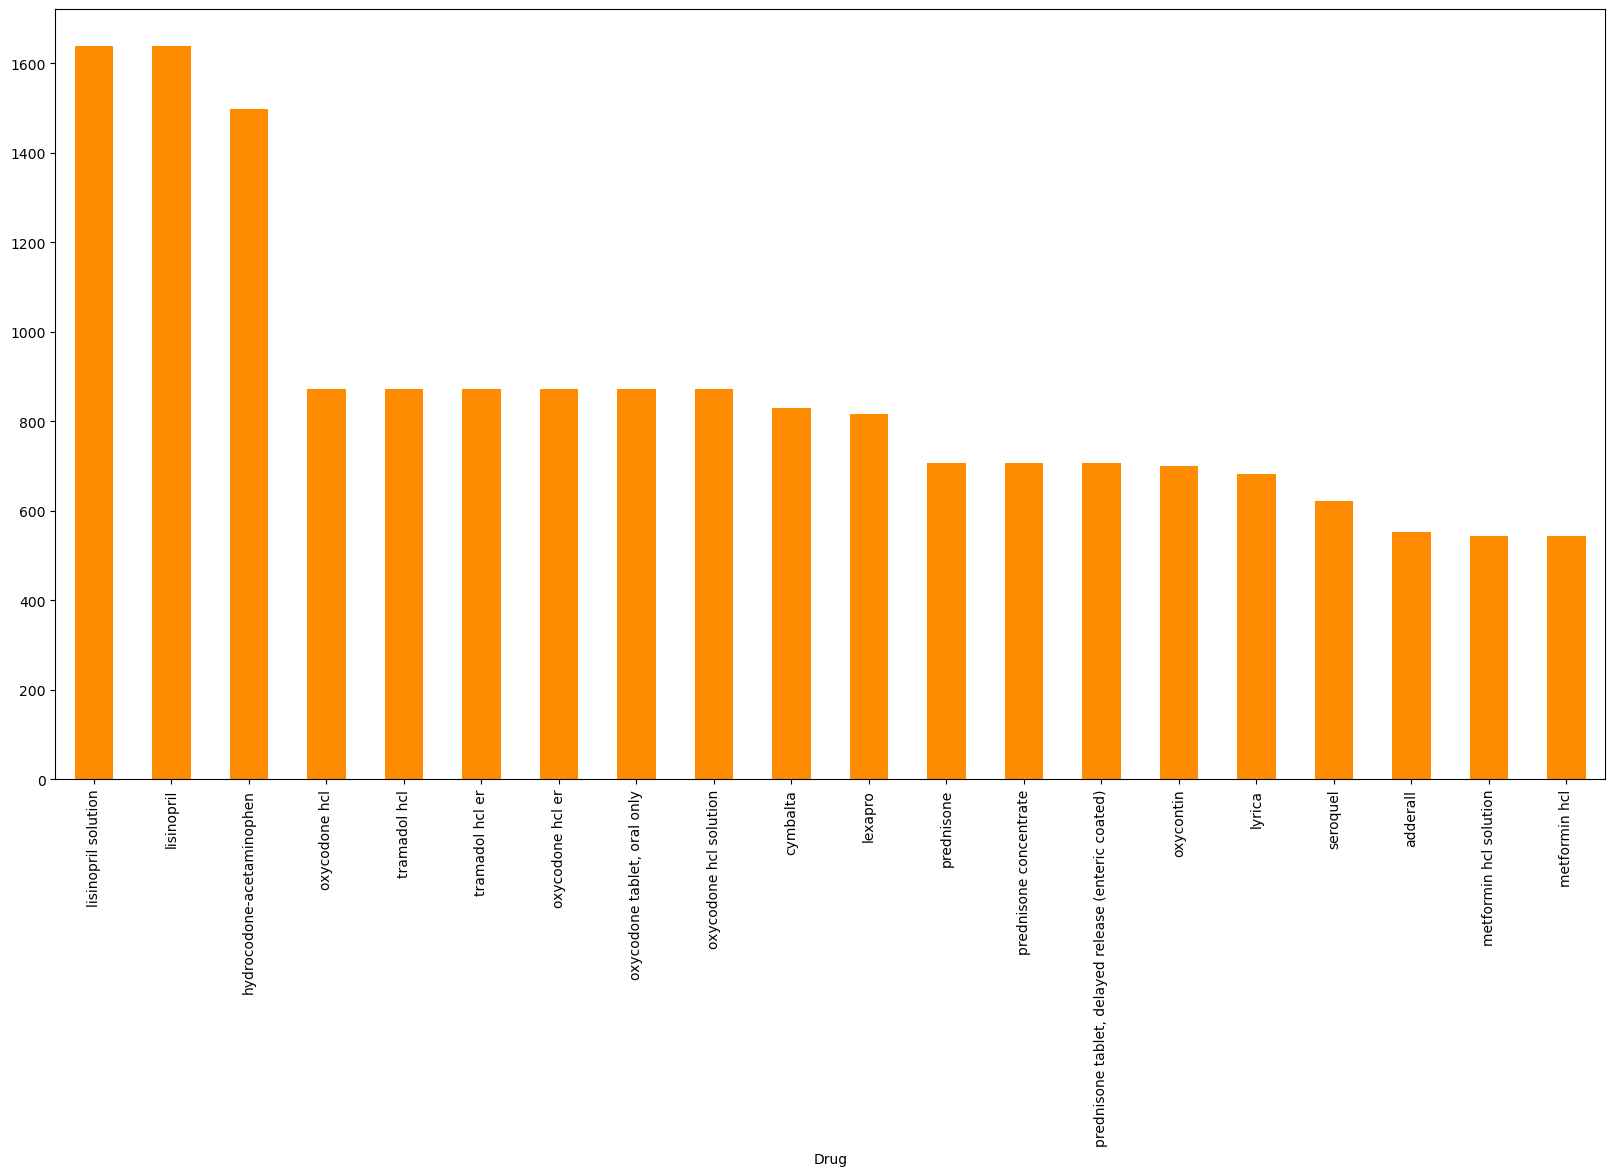

In [68]:
plt.subplots(figsize=(20,10))
dff1['Drug'].value_counts().head(20).plot(kind='bar',color='darkorange')
plt.xlabel('Drug')
plt.show()

Drugs mostly used by Male are lisinopril solution and lisinopril 

In [69]:
dff2=dff.get_group('Female')

In [70]:
dff2['Drug'].value_counts()

cymbalta                                                  3621
lexapro                                                   3095
effexor xr                                                2771
lisinopril solution                                       2383
lisinopril                                                2383
                                                          ... 
xyzbac                                                       1
xylocaine-mpf with epinephrine vial                          1
interferon alfa-n3 solution                                  1
xylitol-antiseptic comb no.5 lozenge, extended release       1
minerin lotion                                               1
Name: Drug, Length: 5882, dtype: int64

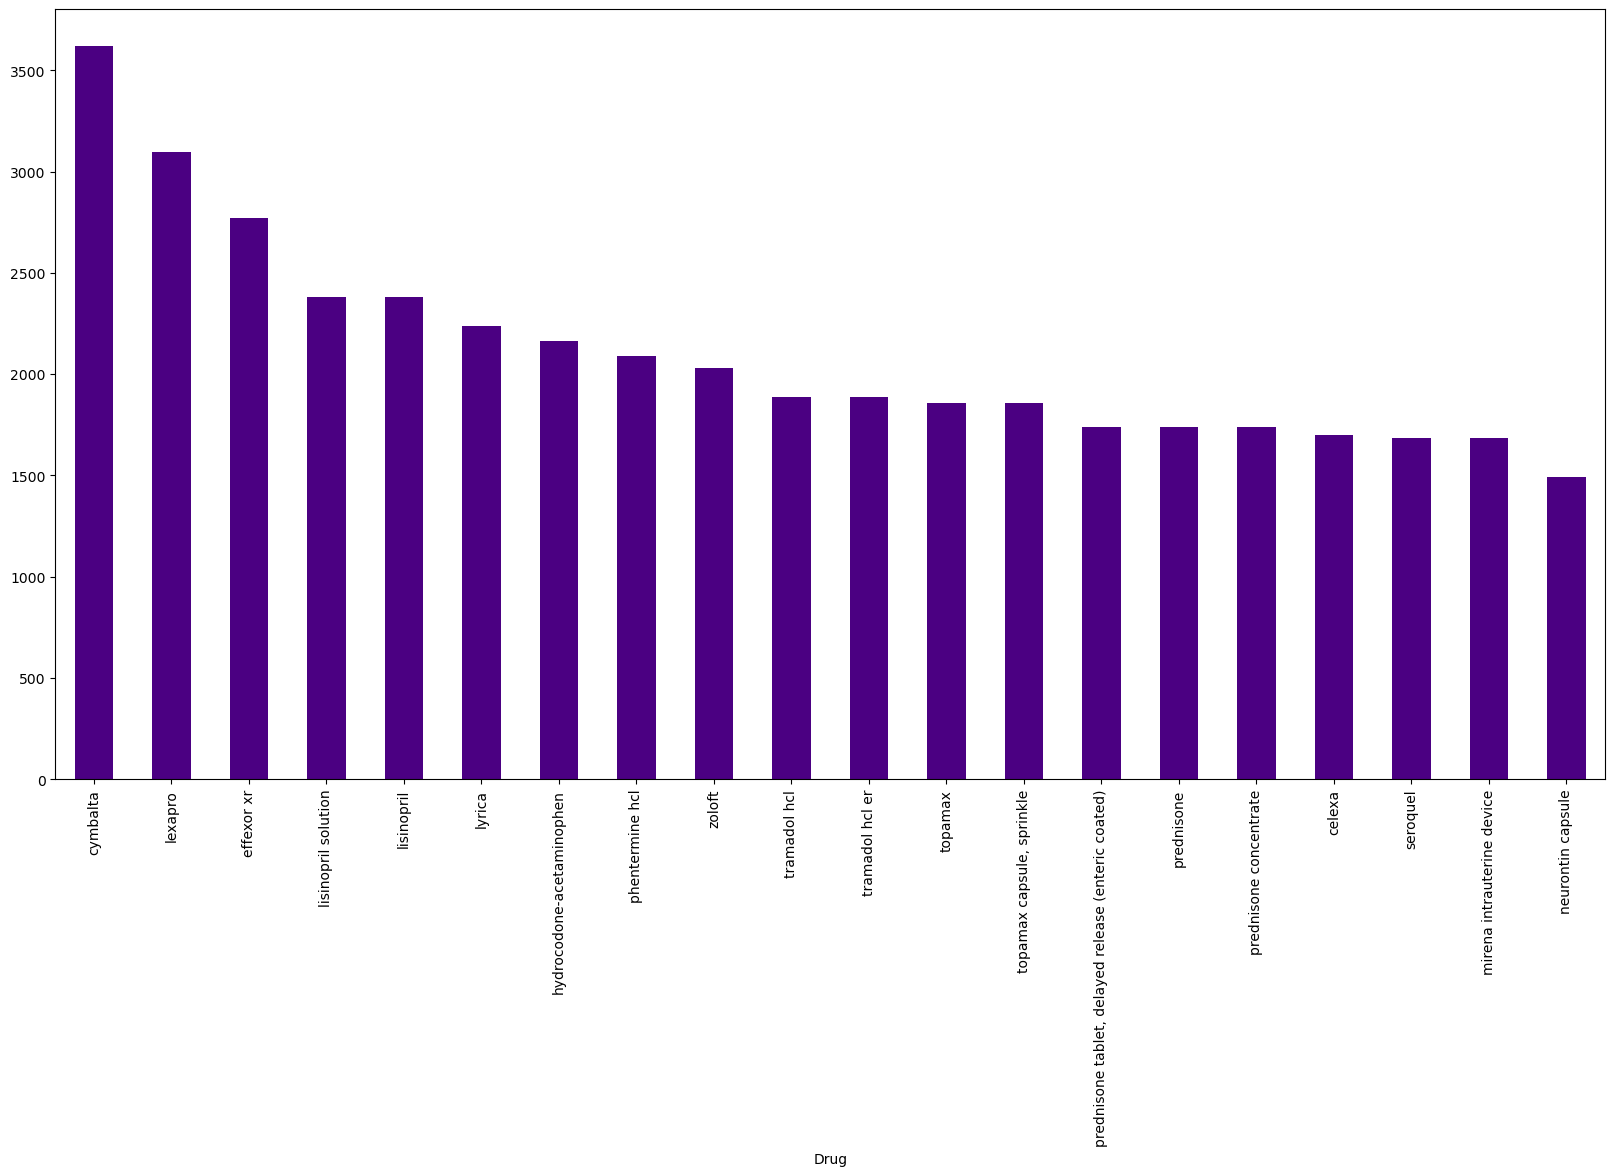

In [71]:
plt.subplots(figsize=(20,10))
dff2['Drug'].value_counts().head(20).plot(kind='bar',color='indigo')
plt.xlabel('Drug')
plt.show()

Drug mostly used by Female is cymbalta

# Most Effective Drug

In [72]:
ddf=new_df.groupby(['Effectiveness'])

In [73]:
ddf1=ddf.get_group(5)

In [74]:
ddf1['Drug'].value_counts()

lexapro                             1690
phentermine hcl                     1386
cymbalta                            1369
effexor xr                          1277
hydrocodone-acetaminophen           1230
                                    ... 
imipenem-cilastatin sodium vial        1
aqu aerosol, spray with pump           1
maginex                                1
magic bullet suppository, rectal       1
nomlands lotion                        1
Name: Drug, Length: 5377, dtype: int64

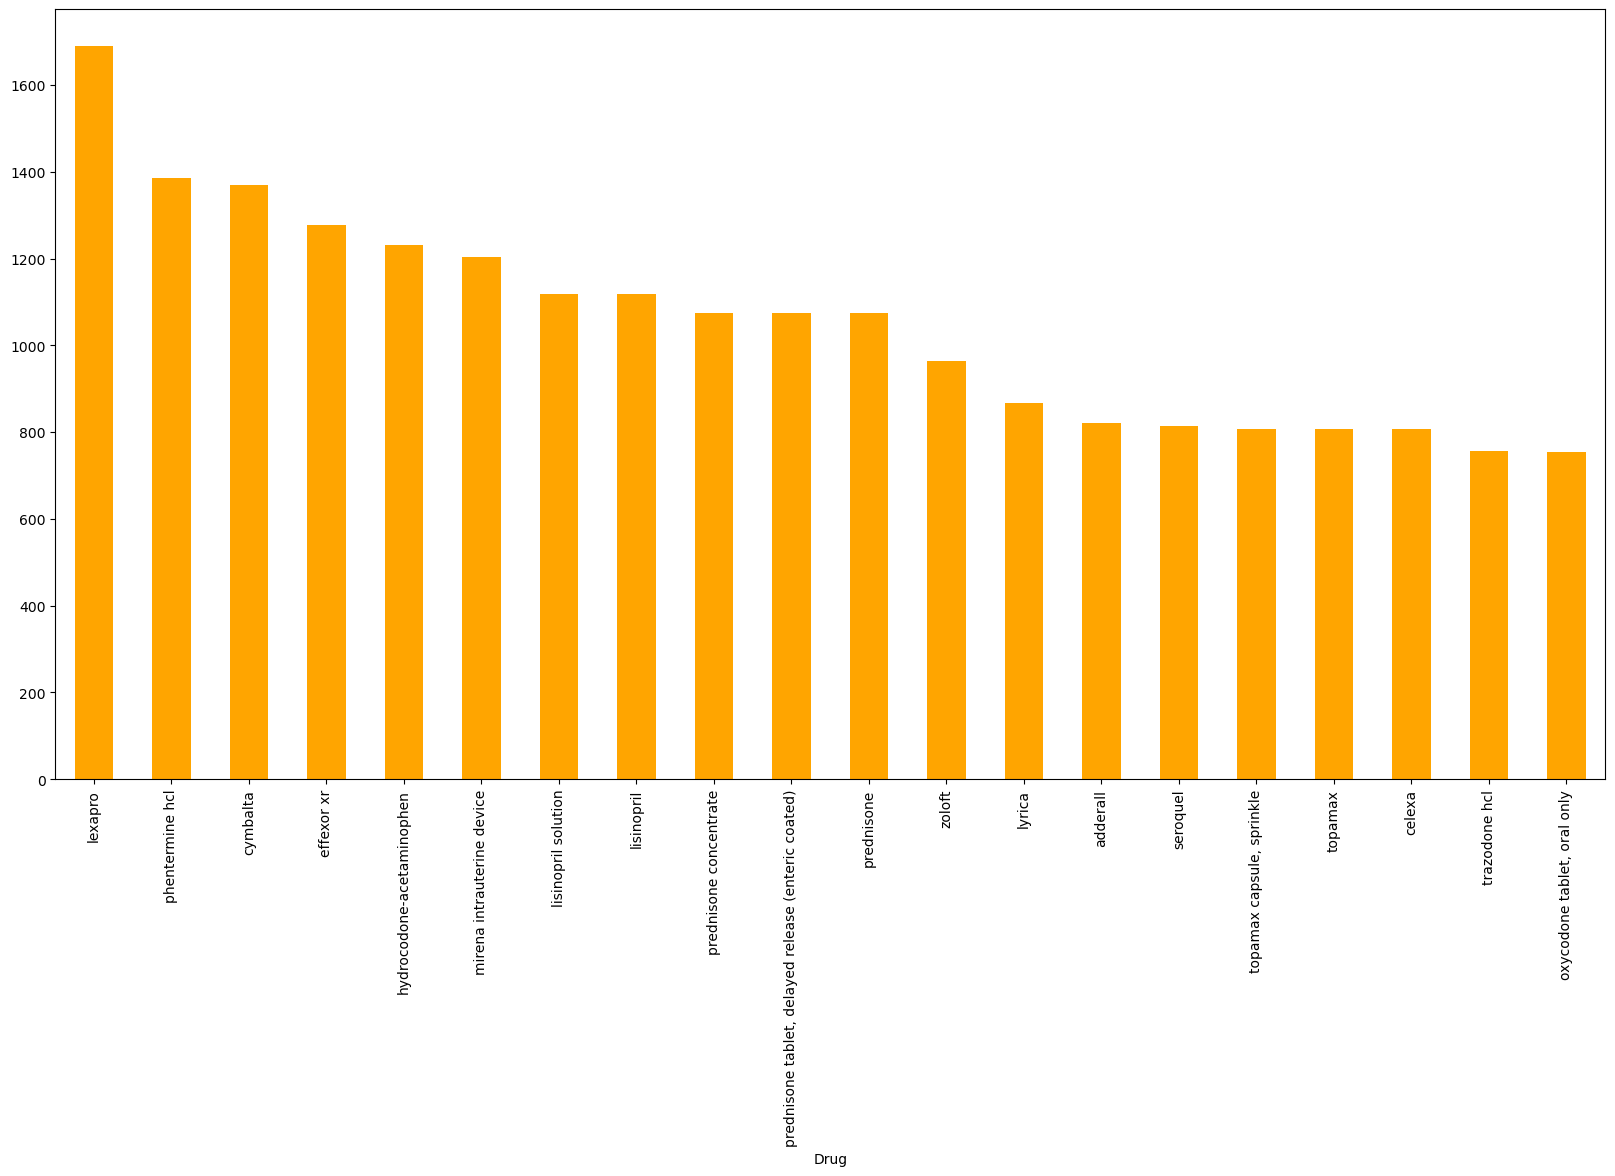

In [75]:
plt.subplots(figsize=(20,10))
ddf1['Drug'].value_counts().head(20).plot(kind='bar',color='orange')
plt.xlabel('Drug')
plt.show()

Lexapro is the most effective drug because it have more 5 star rating compared to others.

In [76]:
ddf2=ddf.get_group(1)

In [77]:
ddf2['Drug'].value_counts()

cymbalta                                                               953
lisinopril solution                                                    666
lisinopril                                                             666
lyrica                                                                 603
tramadol hcl er                                                        555
                                                                      ... 
nilandron                                                                1
xylocaine vial                                                           1
xylitol-antiseptic comb no.5 lozenge, extended release                   1
fentanyl-ropivacaine-nacl (pf) 5 mcg/ml-0.0625 % injection solution      1
warfarin (bulk) 100 % powder                                             1
Name: Drug, Length: 3912, dtype: int64

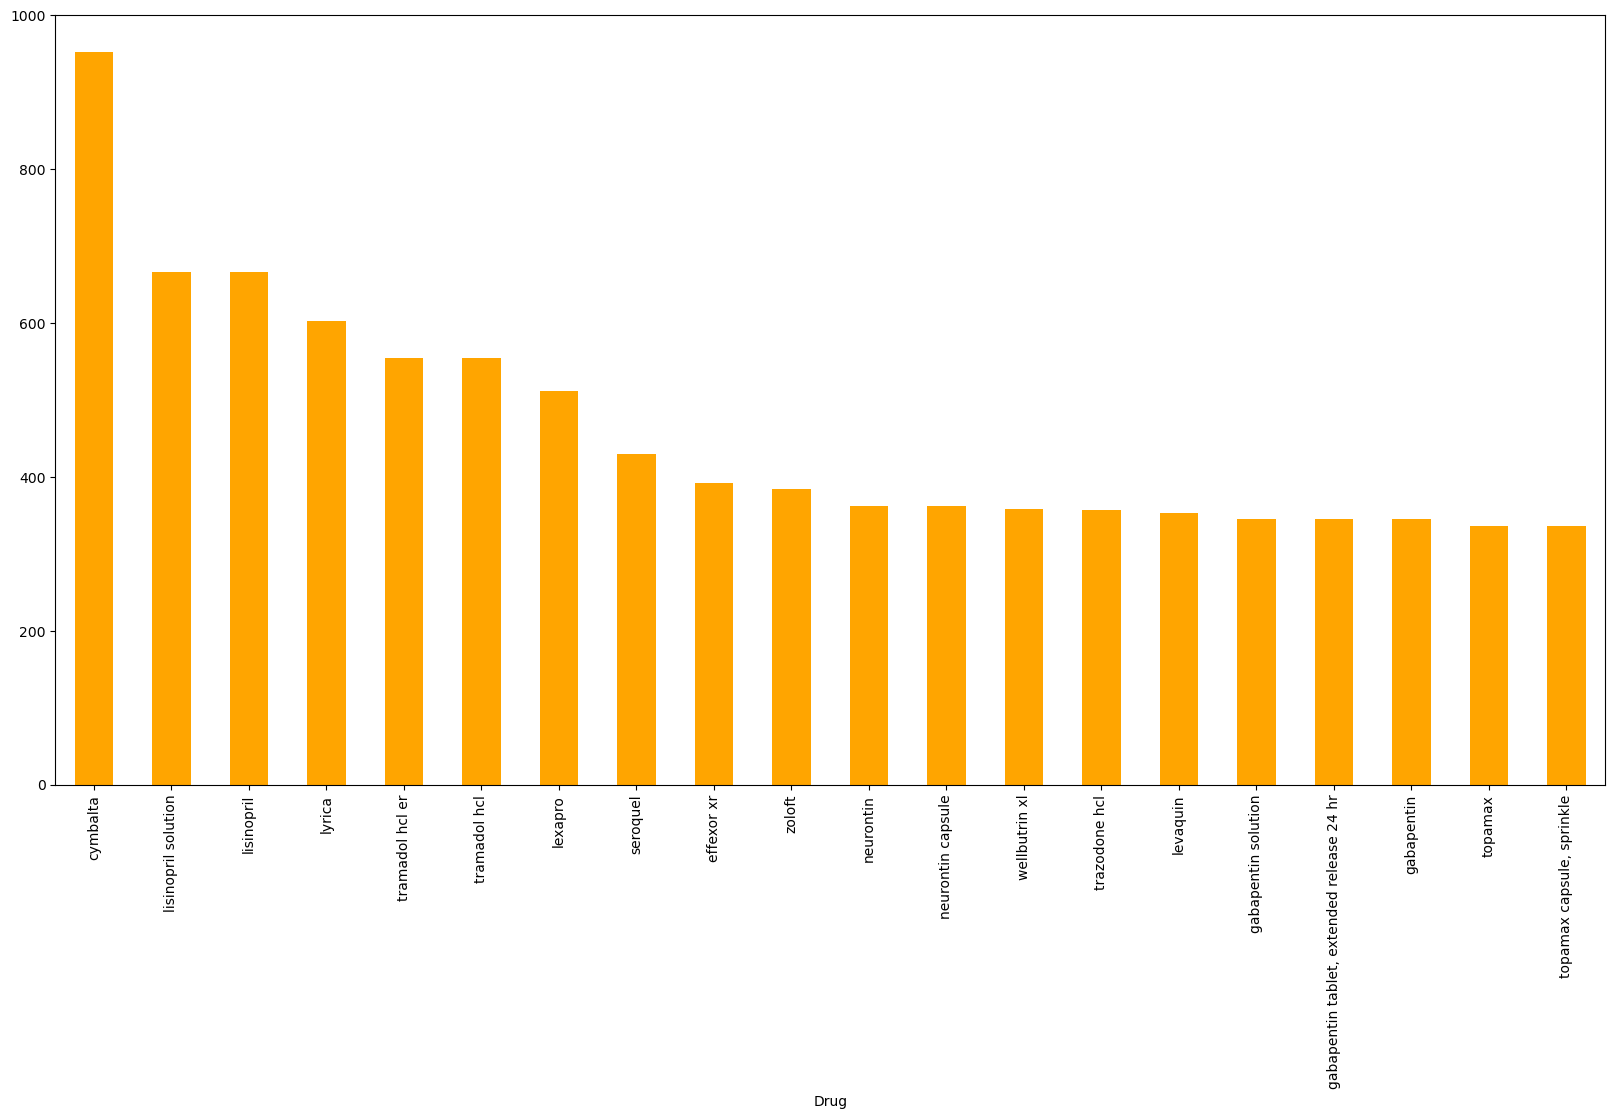

In [78]:
plt.subplots(figsize=(20,10))
ddf2['Drug'].value_counts().head(20).plot(kind='bar',color='orange')
plt.xlabel('Drug')
plt.show()

Cymbalta is the less effective drug because it has more 1 star rating compared to others.

# Most Satisfied Drug

In [79]:
ddff=new_df.groupby(['Satisfaction'])

In [80]:
ddff1=ddff.get_group(5)

In [81]:
ddff1['Drug'].value_counts()

lexapro                                    1521
hydrocodone-acetaminophen                  1310
phentermine hcl                            1291
cymbalta                                   1268
effexor xr                                 1011
                                           ... 
acerola c wafer                               1
acetaminophen pm xtra strength                1
acetaminophen suppository, rectal             1
mg217 psoriasis ointment                      1
allergy relief tablet, extended release       1
Name: Drug, Length: 5306, dtype: int64

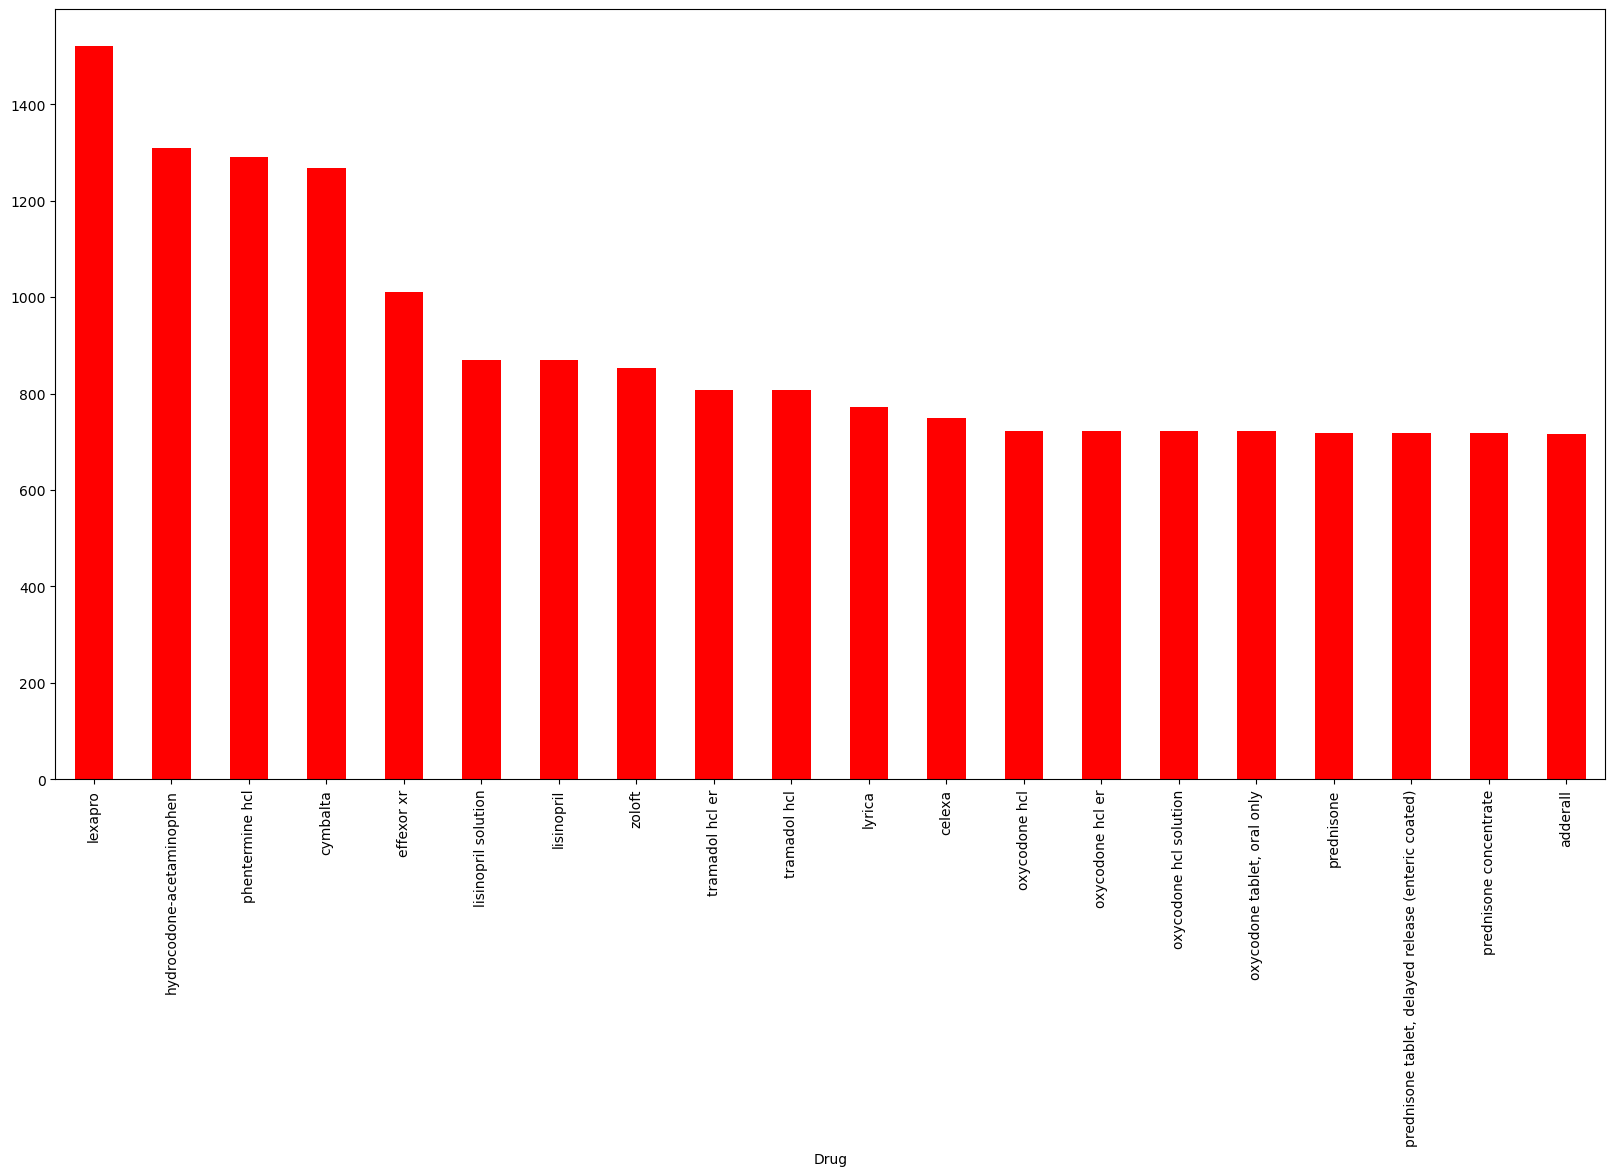

In [82]:
plt.subplots(figsize=(20,10))
ddff1['Drug'].value_counts().head(20).plot(kind='bar',color='red')
plt.xlabel('Drug')
plt.show()

People are more satisfied with the drug lexapro 

In [83]:
ddff2=ddff.get_group(1)

In [84]:
ddff2['Drug'].value_counts()

lisinopril solution                                       1518
lisinopril                                                1518
cymbalta                                                  1490
lyrica                                                     929
tramadol hcl er                                            838
                                                          ... 
xylitol-antiseptic comb no.5 lozenge, extended release       1
xylitol (bulk) powder                                        1
xanthan gum powder                                           1
xalkori                                                      1
maginex                                                      1
Name: Drug, Length: 4408, dtype: int64

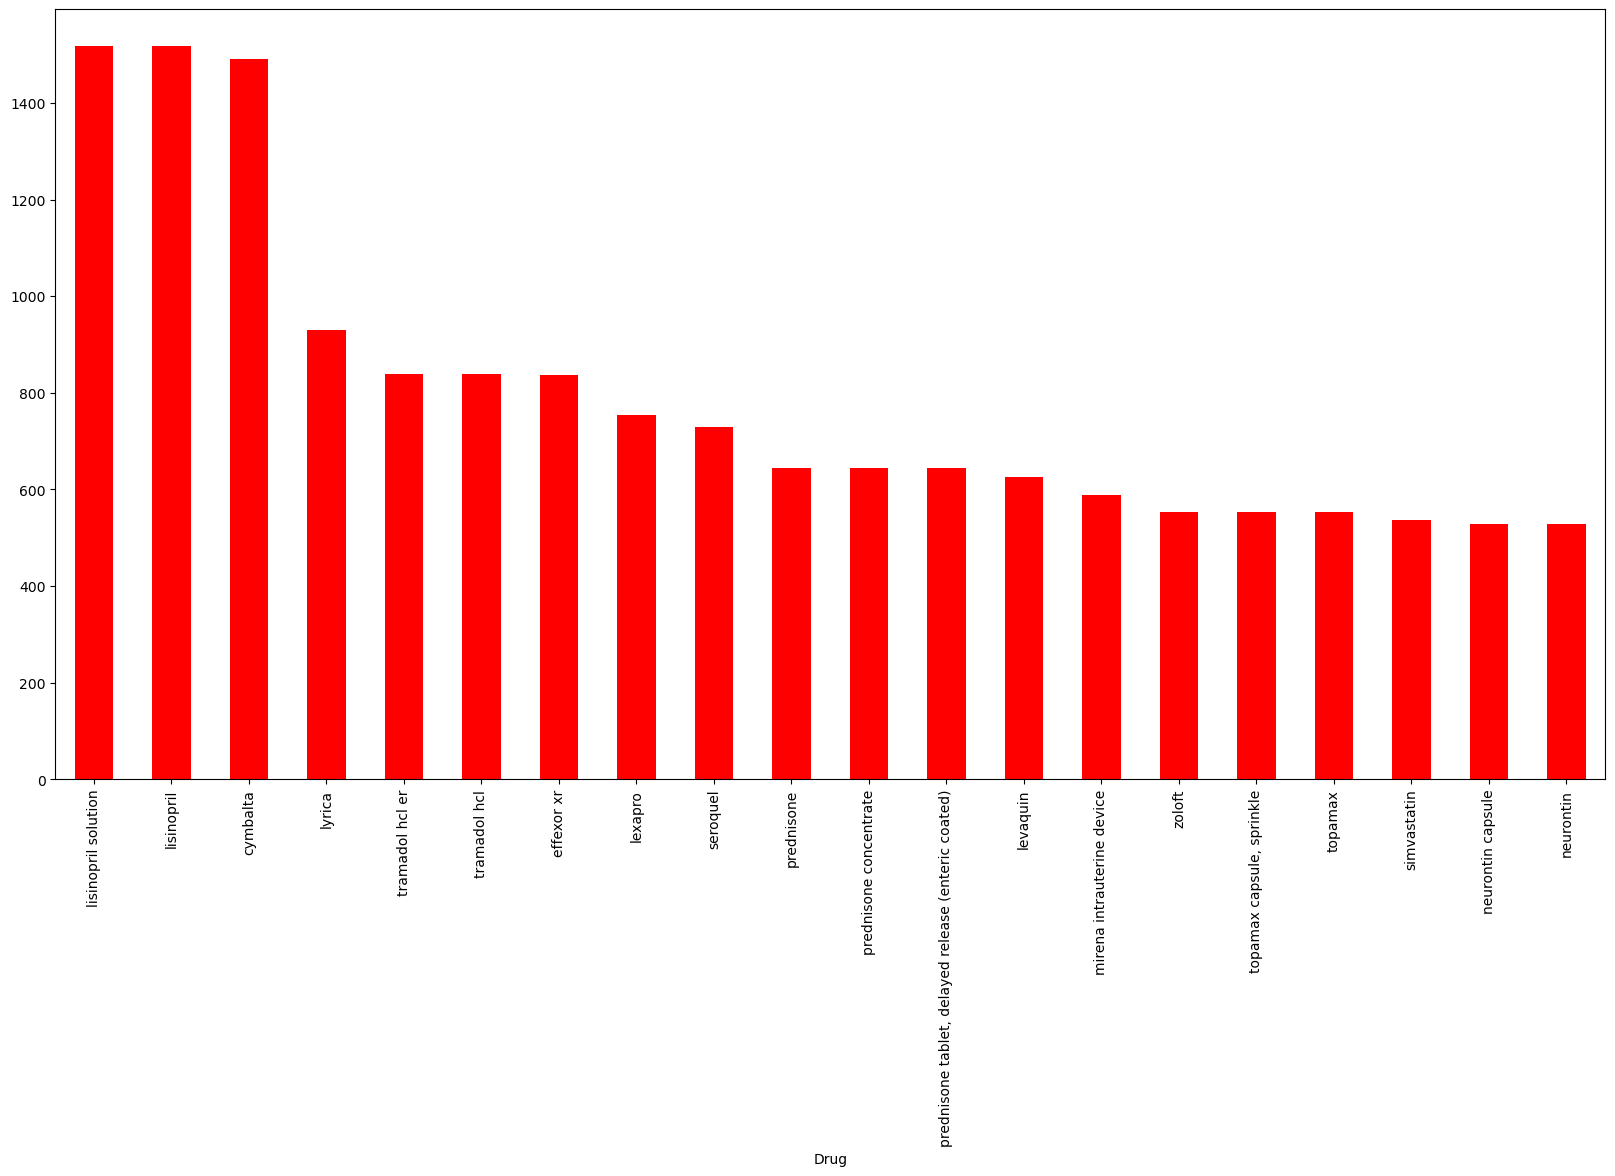

In [85]:
plt.subplots(figsize=(20,10))
ddff2['Drug'].value_counts().head(20).plot(kind='bar',color='red')
plt.xlabel('Drug')
plt.show()

People are not satisfied with the drug lisinopril solution . But still many people are using that. May be because of its side effects people are not satisfied with that drug.

In [86]:
drug=new_df.groupby(['Drug'])

In [87]:
drug1=drug.get_group('lexapro')

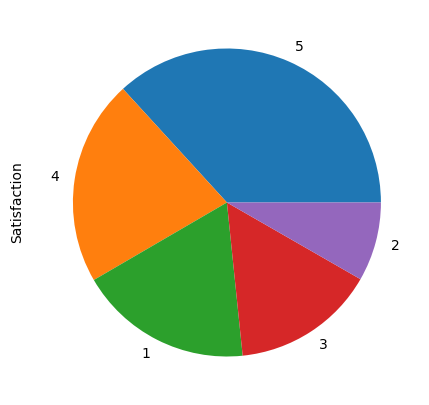

In [88]:
plt.subplots(figsize=(5,5))
drug1['Satisfaction'].value_counts().head(20).plot(kind='pie')
plt.show()

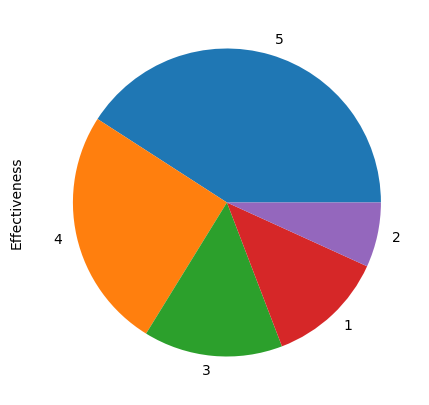

In [89]:
plt.subplots(figsize=(5,5))
drug1['Effectiveness'].value_counts().head(20).plot(kind='pie')
plt.show()

In [90]:
drug2=drug.get_group('cymbalta')

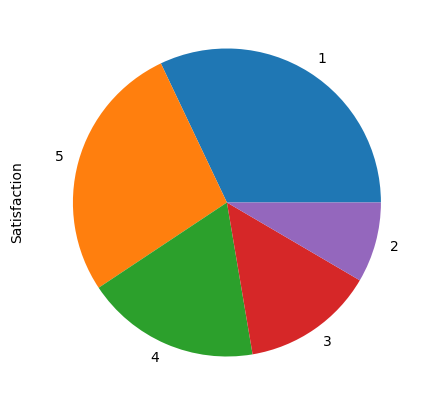

In [91]:
plt.subplots(figsize=(5,5))
drug2['Satisfaction'].value_counts().head(20).plot(kind='pie')
plt.show()

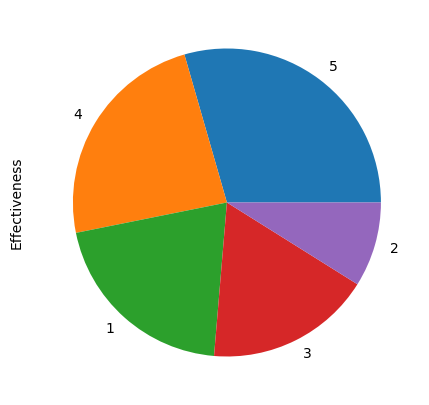

In [92]:
plt.subplots(figsize=(5,5))
drug2['Effectiveness'].value_counts().head(20).plot(kind='pie')
plt.show()

In [93]:
drug3=drug.get_group('lisinopril solution')

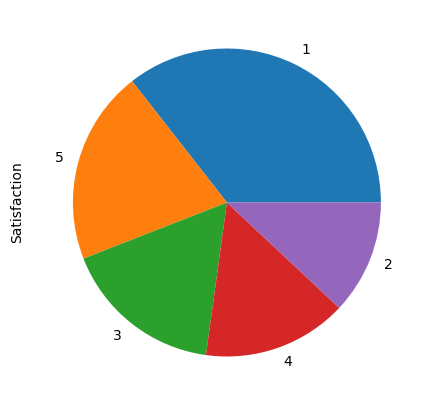

In [94]:
plt.subplots(figsize=(5,5))
drug3['Satisfaction'].value_counts().head(20).plot(kind='pie')
plt.show()

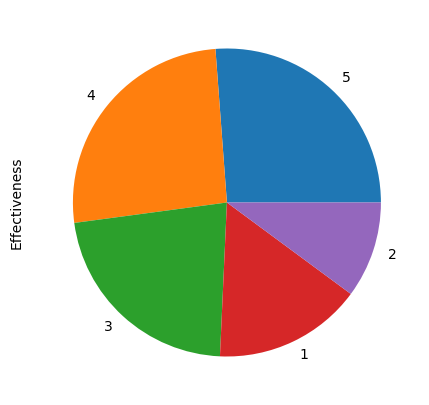

In [95]:
plt.subplots(figsize=(5,5))
drug3['Effectiveness'].value_counts().head(20).plot(kind='pie')
plt.show()

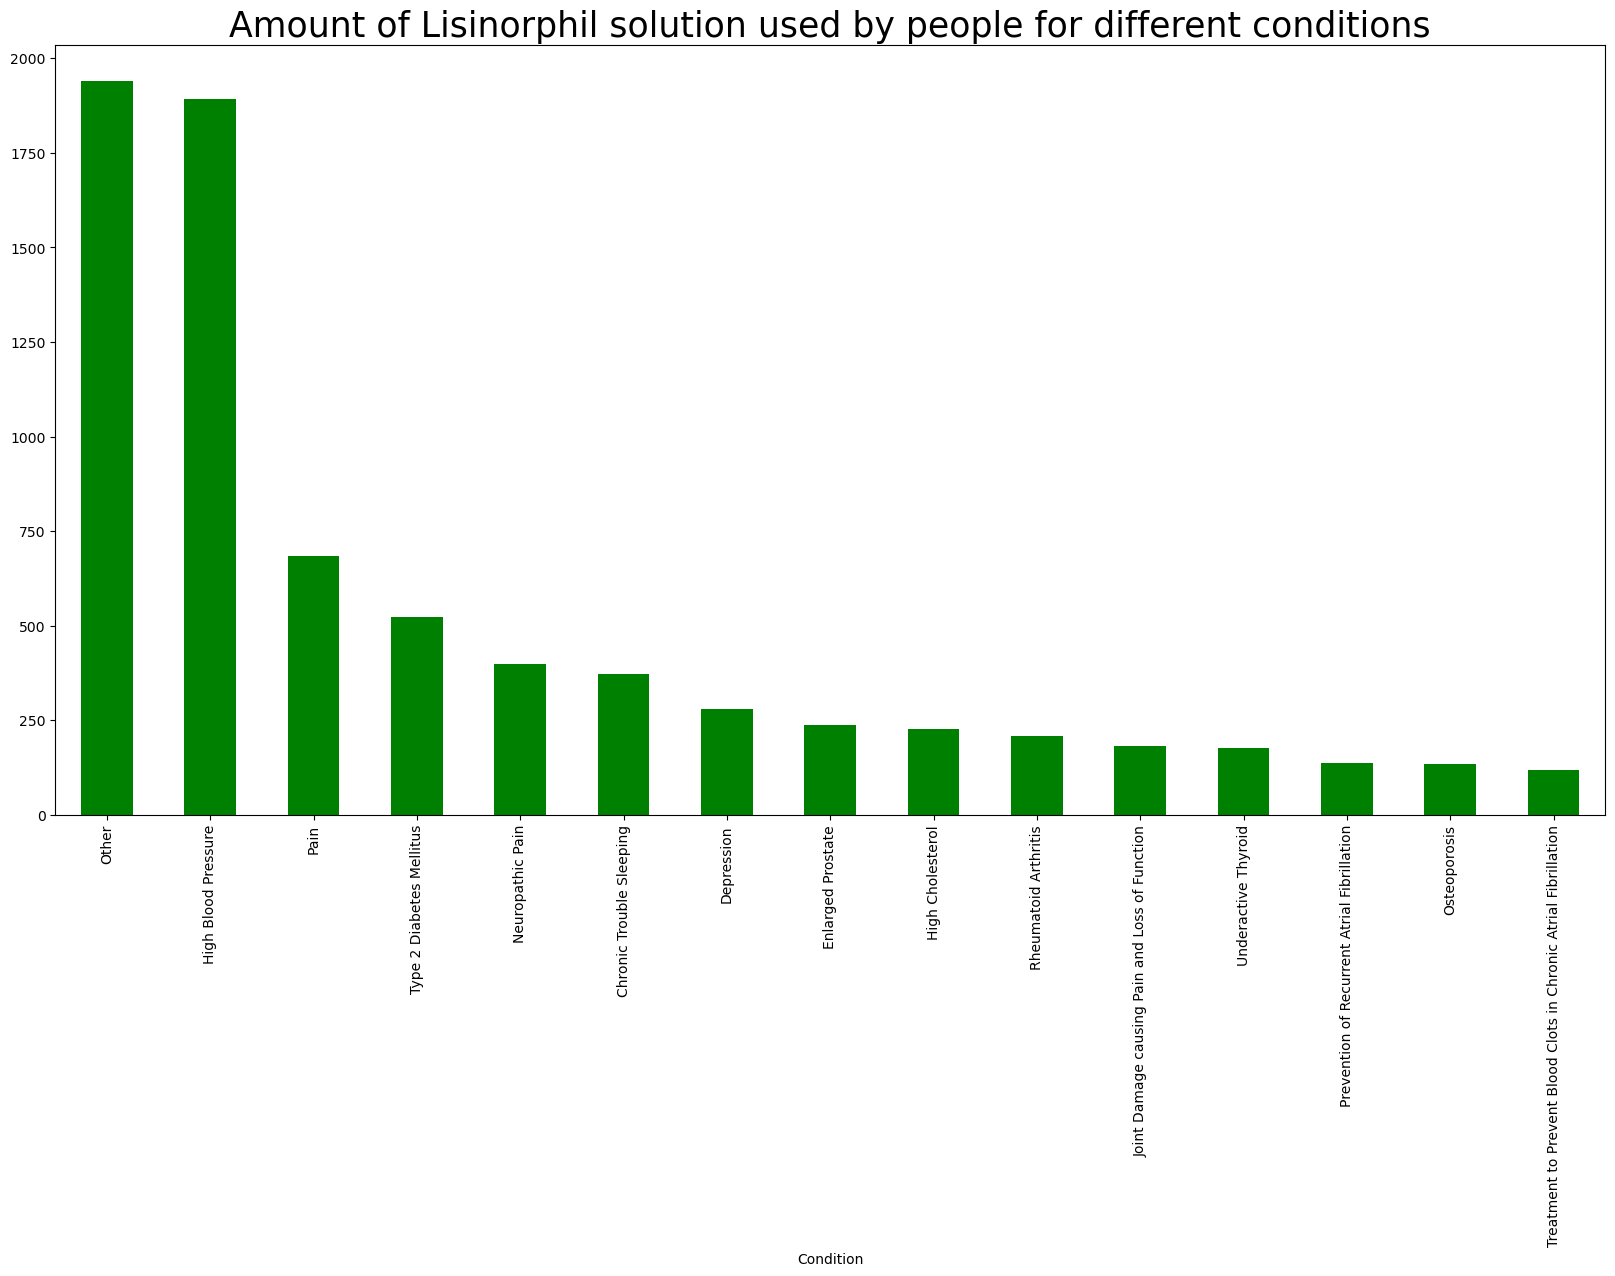

In [96]:
plt.subplots(figsize=(20,10))
df1['Condition'].value_counts().head(15).plot(kind='bar',color='green')
plt.title('Amount of Lisinorphil solution used by people for different conditions',fontsize=25)
plt.xlabel('Condition')
plt.show()

It is mainly used for high blood pressure.

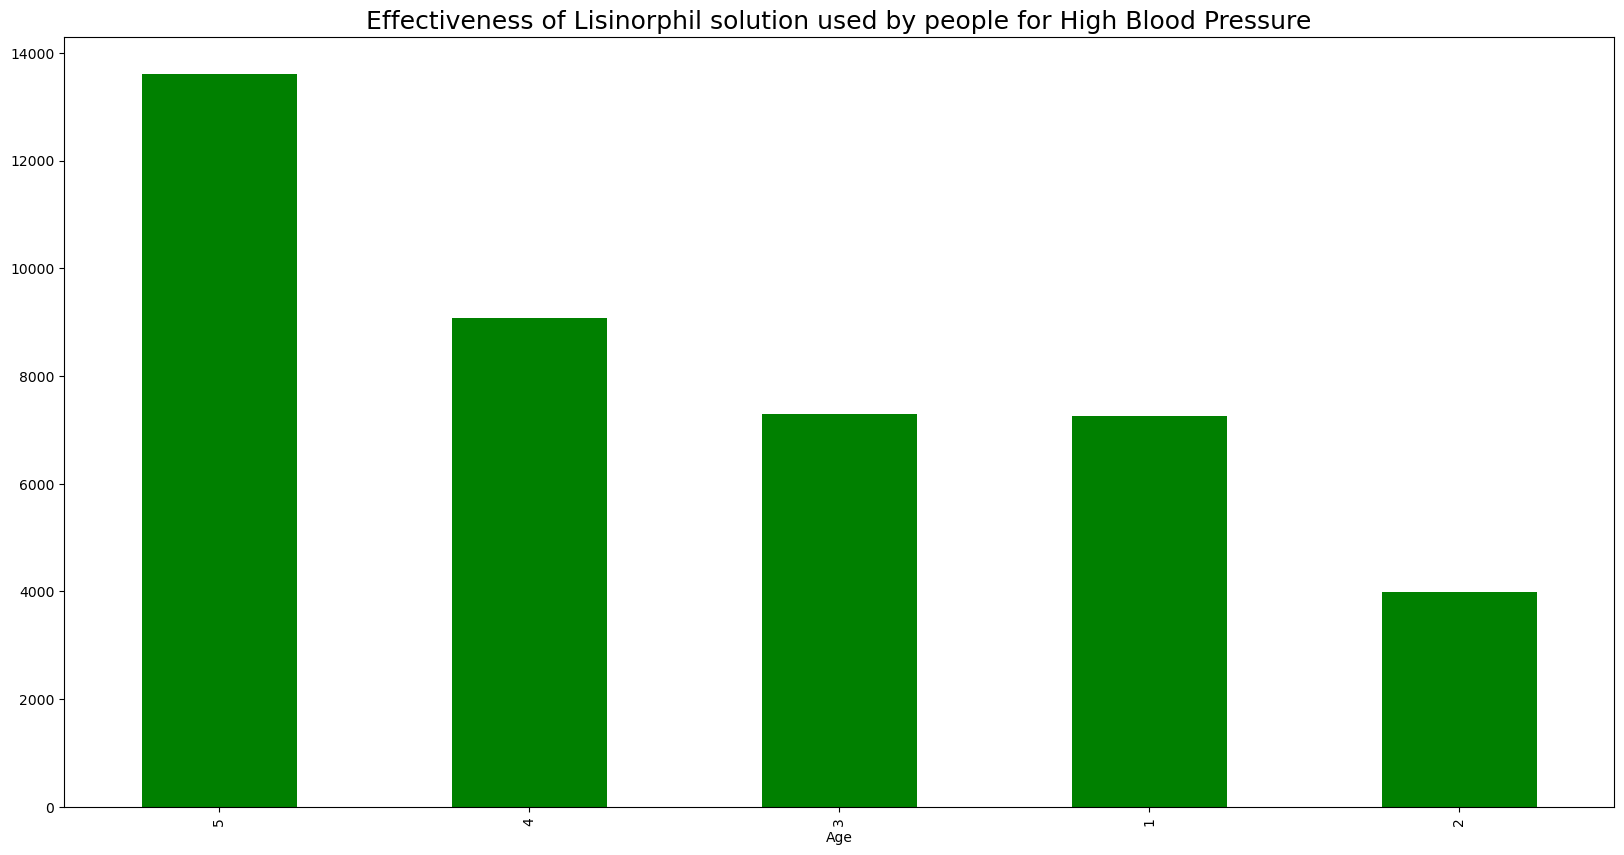

In [97]:
plt.subplots(figsize=(20,10))
df2['Effectiveness'].value_counts().head(15).plot(kind='bar',color='green')
plt.title('Effectiveness of Lisinorphil solution used by people for High Blood Pressure',fontsize=18)
plt.xlabel('Age')
plt.show()

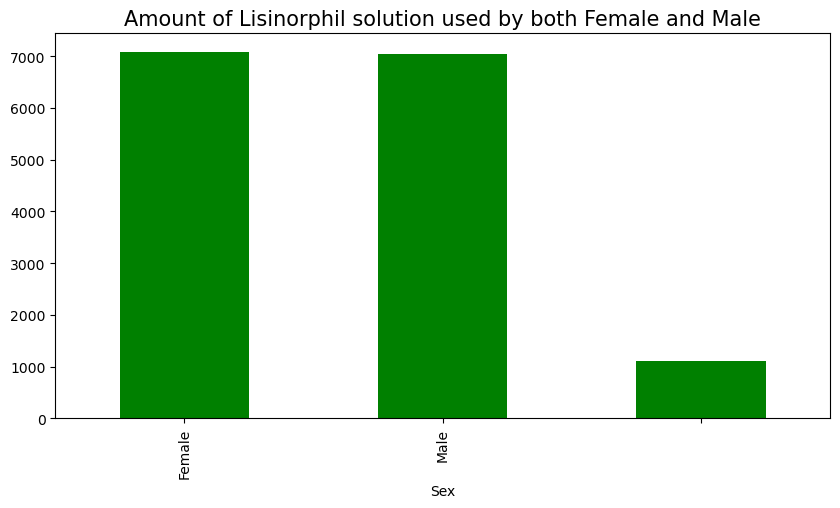

In [98]:
plt.subplots(figsize=(10,5))
df1['Sex'].value_counts().head(15).plot(kind='bar',color='green')
plt.title('Amount of Lisinorphil solution used by both Female and Male',fontsize=15)
plt.xlabel('Sex')
plt.show()

It is used more by female

In [99]:
df3=df1.groupby('Sex').get_group('Male')

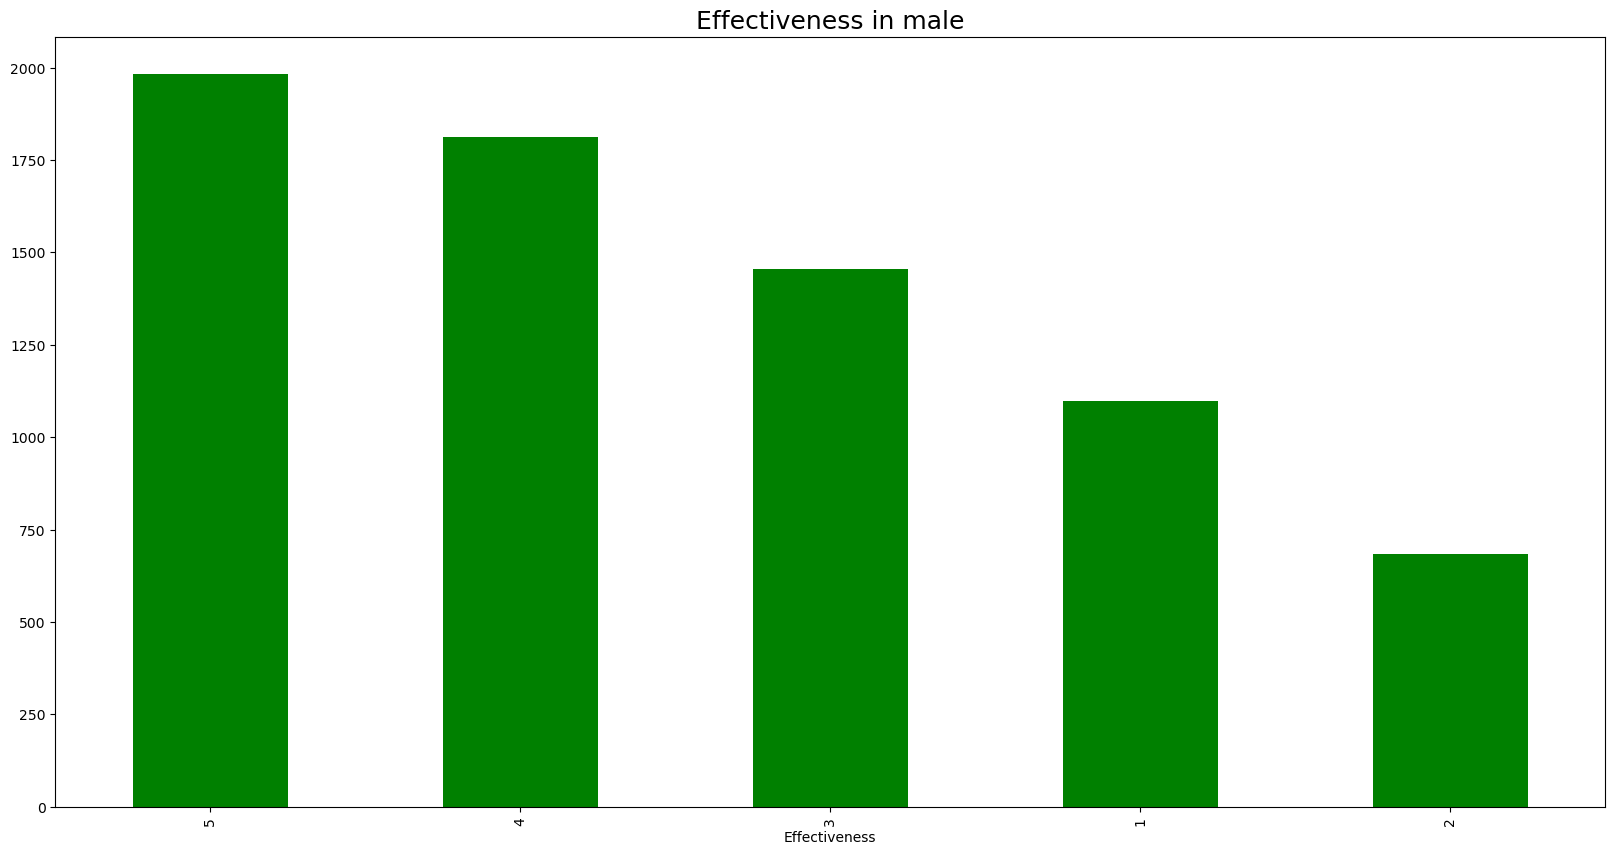

In [100]:
plt.subplots(figsize=(20,10))
df3['Effectiveness'].value_counts().head(15).plot(kind='bar',color='green')
plt.title('Effectiveness in male',fontsize=18)
plt.xlabel('Effectiveness')
plt.show()

In [101]:
df4=df1.groupby('Sex').get_group('Female')

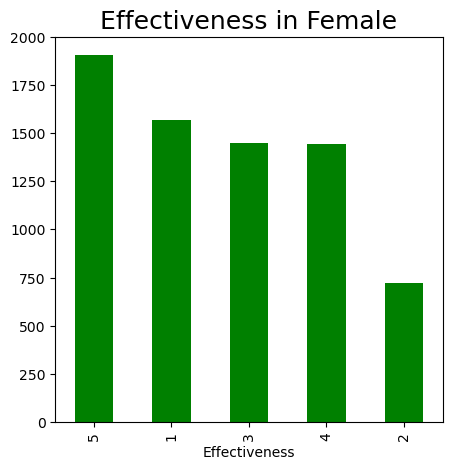

In [102]:
plt.subplots(figsize=(5,5))
df4['Effectiveness'].value_counts().head(15).plot(kind='bar',color='green')
plt.title('Effectiveness in Female',fontsize=18)
plt.xlabel('Effectiveness')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

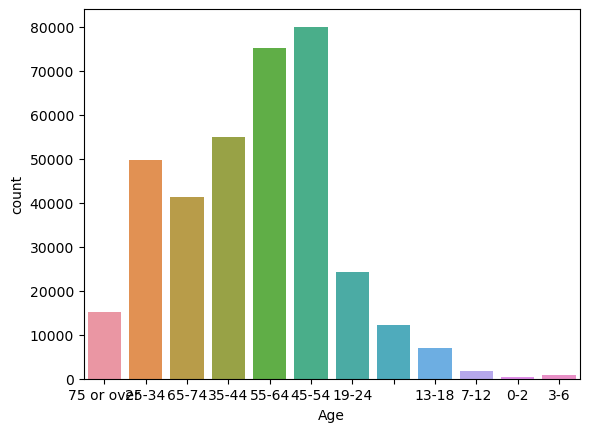

In [103]:
sns.countplot(new_df['Age'])

People between 45-54 age groups are more.

<AxesSubplot:xlabel='Sex', ylabel='count'>

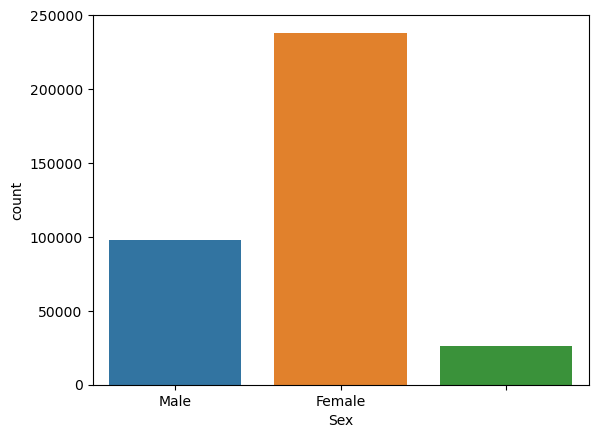

In [104]:
sns.countplot(new_df['Sex'])

Female count is higher than males

## Heatmap

<AxesSubplot:>

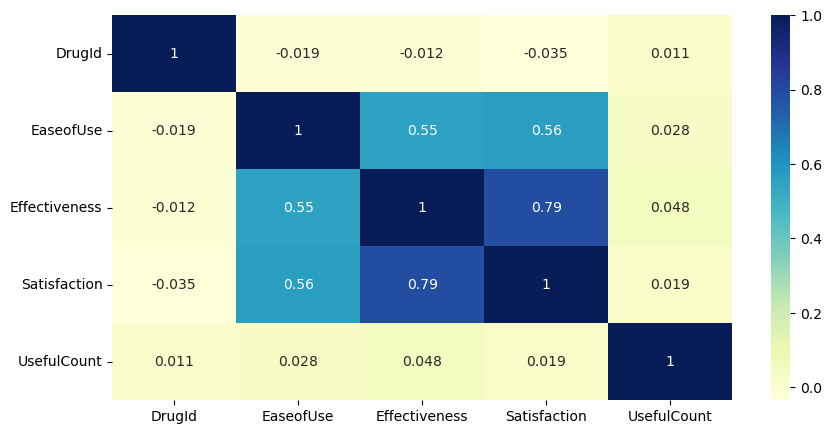

In [105]:
plt.figure(figsize = (10,5))
sns.heatmap(new_df.corr(), annot = True,cmap = 'YlGnBu')

The columns effectiveness and Satisfaction are highly correlated.

# DATA PREPROCESSING

## 1. Removing null values

In [106]:
#checking missing values
new_df.isnull().sum()

Name              0
Race              0
Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

The Column 'Review' has 37 missing values

In [107]:
# Dropping null values
data1 = new_df.dropna()

In [108]:
data1.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

## 2. Removing unwanted labels and white spaces

In [109]:
data1['Effectiveness'].unique()

array([ 5,  3,  2,  1,  4,  6, 10], dtype=int64)

In [110]:
data1['EaseofUse'].unique()

array([ 5,  2,  1,  4,  3,  6, 10], dtype=int64)

In [111]:
data1['Satisfaction'].unique()

array([ 5,  3,  1,  4,  2,  6, 10], dtype=int64)

Effectiveness, EaseofUse, Satisfaction are 5 star ratings. So numbers in those columns will be 1 to 5. But here we can see 6 and 10. We are going to remove those rows.

In [112]:
data1[data1['Effectiveness']==6].index

Int64Index([195073, 195282], dtype='int64')

In [113]:
data1[data1['Effectiveness']==10].index

Int64Index([273577], dtype='int64')

In [114]:
data1[data1['EaseofUse']==6].index

Int64Index([195073, 195282], dtype='int64')

In [115]:
data1[data1['EaseofUse']==10].index

Int64Index([273577], dtype='int64')

In [116]:
data1[data1['Satisfaction']==6].index

Int64Index([195073, 195282], dtype='int64')

In [117]:
data1[data1['Satisfaction']==10].index

Int64Index([273577], dtype='int64')

In [118]:
data1=data1.drop([195073, 195282,273577])

In [119]:
data1['EaseofUse'].unique()

array([5, 2, 1, 4, 3], dtype=int64)

In [120]:
data1['Satisfaction'].unique()

array([5, 3, 1, 4, 2], dtype=int64)

In [121]:
data1['Effectiveness'].unique()

array([5, 3, 2, 1, 4], dtype=int64)

In [122]:
data1['Age'].unique()

array(['75 or over', '25-34', '65-74', '35-44', '55-64', '45-54', '19-24',
       ' ', '13-18', '7-12', '0-2', '3-6'], dtype=object)

In [123]:
data1[data1['Age']== ' '].index

Int64Index([    12,     73,     91,    184,    185,    209,    325,    511,
               587,    589,
            ...
            362236, 362350, 362405, 362425, 362450, 362517, 362571, 362598,
            362645, 362802],
           dtype='int64', length=12199)

In [124]:
ind1=data1[data1['Age']== ' '].index

In [125]:
data1['Age'].mode()

0    45-54
Name: Age, dtype: object

In [126]:
data1['Age'][ind1]='45-54'

In [127]:
data1[data1['Age']== ' '].index

Int64Index([], dtype='int64')

In [128]:
data1['Sex'].unique()

array(['Male', 'Female', ' '], dtype=object)

In [129]:
data1[data1['Sex']== ' '].index

Int64Index([    11,     14,     15,     17,     20,     22,     24,     31,
                33,     34,
            ...
            362405, 362414, 362450, 362488, 362517, 362571, 362645, 362673,
            362800, 362802],
           dtype='int64', length=26532)

In [130]:
ind2=data1[data1['Sex']== ' '].index

In [131]:
data1['Sex'].mode()

0    Female
Name: Sex, dtype: object

In [132]:
data1['Sex'][ind2]='Female'

In [133]:
data1[data1['Sex']== ' '].index

Int64Index([], dtype='int64')

In [134]:
data1['Condition'].unique()

array(['Stuffy Nose', 'Cold Symptoms', 'Other', ...,
       'Combative and Explosive Behavior', 'Lead Poisoning',
       'Poisoning from Swallowed Unknown Substance'], dtype=object)

In [135]:
data1[data1['Condition']== ' '].index

Int64Index([ 31316,  37013,  37117,  49273,  52267,  63607,  63676,  63722,
             68864,  71020,  75003,  90380,  90512,  90777,  98289,  98440,
            105702, 113904, 118300, 118311, 121989, 135173, 140701, 144696,
            171731, 186903, 190720, 223756, 223764, 224266, 225702, 229030,
            229086, 239316, 263893, 264204, 282976, 301436, 326306, 336975,
            342915, 342937, 347026],
           dtype='int64')

In [136]:
ind3=data1[data1['Condition']== ' '].index

In [137]:
data1=data1.drop(ind3)

In [138]:
data1.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Philip Bailey,Native American,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Kevin Gomez,White,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Nicole Hansen,White,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Jessica Bennett,Asian,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Katie Cline,Native American,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


## 3. Handling Outliers

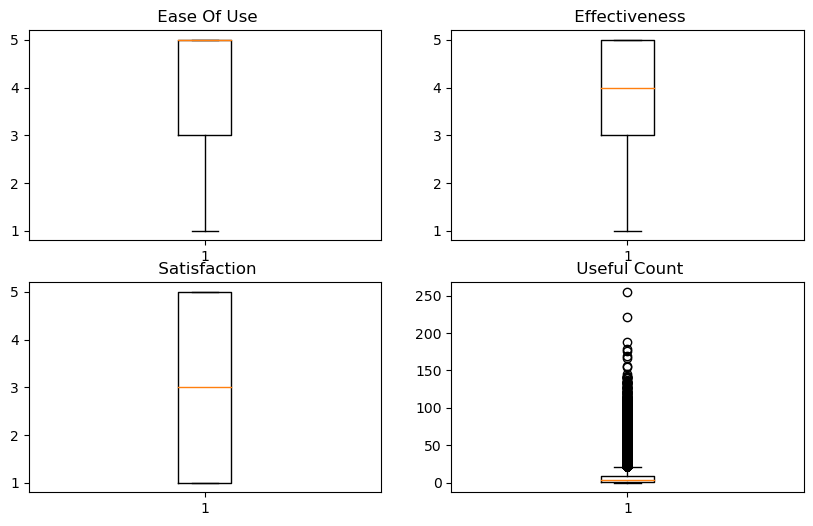

In [139]:
#Using boxplot
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data1["EaseofUse"])
plt.title(" Ease Of Use")

plt.subplot(2,2,2)
plt.boxplot(data1["Effectiveness"])
plt.title(" Effectiveness")

plt.subplot(2,2,3)
plt.boxplot(data1["Satisfaction"])
plt.title(" Satisfaction")

plt.subplot(2,2,4)
plt.boxplot(data1["UsefulCount"])
plt.title(" Useful Count")
plt.show()

Outliers are present in the column UsefulCount.

In [140]:
#Treating Outliers

In [141]:
from scipy import stats
IQR = stats.iqr(data1['UsefulCount'], interpolation = 'midpoint')
IQR

8.0

In [142]:
Q1 = data1['UsefulCount'].quantile(0.25)
Q3 = data1['UsefulCount'].quantile(0.75)
min_limit = Q1-1.5*IQR
max_limit = Q3+1.5*IQR
min_limit,max_limit

(-11.0, 21.0)

In [143]:
data1.loc[data1['UsefulCount']>max_limit]

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
82,Joshua Schwartz,Asian,25-34,Abnormally Long or Heavy Periods,6/30/2012,lysteda,154120,4,3,I had heavy periods most of my adult life. Lar...,1,Female,"Nausea , vomiting , diarrhea , and muscle p...",29
94,Michelle Hansen,Black,45-54,Abnormally Long or Heavy Periods,3/11/2012,lysteda,154120,1,1,my 44 year old sister is in the neuro ICU from...,1,Female,"Nausea , vomiting , diarrhea , and muscle p...",30
140,Kimberly Vincent,Black,45-54,Abnormally Long or Heavy Periods,7/1/2011,lysteda,154120,5,5,"Due to fibroids, I have had 2 days a month of ...",5,Female,"Nausea , vomiting , diarrhea , and muscle p...",25
146,Kevin Peterson,Hispanic,35-44,Abnormally Long or Heavy Periods,3/30/2011,lysteda,154120,5,4,I can not say enough good things about Lysteda...,5,Female,"Nausea , vomiting , diarrhea , and muscle p...",23
165,Nicholas Rodriguez,Hispanic,35-44,Abnormally Long or Heavy Periods,11/28/2010,lysteda,154120,5,5,Trying to be thorough for those who are wonder...,5,Female,"Nausea , vomiting , diarrhea , and muscle p...",25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362441,Jay Baker,Native American,35-44,Stop Smoking,11/21/2007,chantix,144470,4,5,Wife and I got on it together about 2-3 weeks ...,1,Male,"Nausea , headache , vomiting , drowsiness, g...",22
362448,Megan Turner,Black,45-54,Stop Smoking,11/15/2007,chantix,144470,5,5,The extreme side effects made it necessary to ...,1,Female,"Nausea , headache , vomiting , drowsiness, g...",33
362497,Tina Brock,Black,45-54,Stop Smoking,5/12/2010,chantix,144470,5,5,"First, take this medication on a full stomach....",4,Female,"Nausea , headache , vomiting , drowsiness, g...",23
362516,Richard Hernandez,Native American,55-64,Stop Smoking,4/2/2010,chantix,144470,3,5,I took Chantix for 5 months. I smoked the firs...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",38


In [144]:
data1.loc[data1['UsefulCount']<min_limit]

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount


In [145]:
data1.loc[data1['UsefulCount']>max_limit,'UsefulCount'] = np.median(data1.UsefulCount)

In [146]:
data1.loc[data1['UsefulCount']>max_limit]

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount


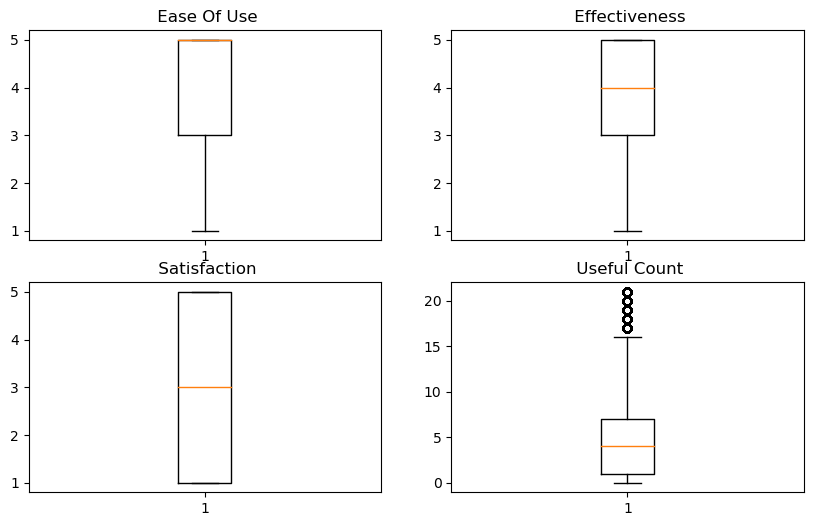

In [147]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data1["EaseofUse"])
plt.title(" Ease Of Use")

plt.subplot(2,2,2)
plt.boxplot(data1["Effectiveness"])
plt.title(" Effectiveness")

plt.subplot(2,2,3)
plt.boxplot(data1["Satisfaction"])
plt.title(" Satisfaction")

plt.subplot(2,2,4)
plt.boxplot(data1["UsefulCount"])
plt.title(" Useful Count")
plt.show()

Outliers has been removed.

## 4. Feature Reduction 

In [148]:
#Removing other columns
data1=data1.drop(['Name','Race','Reviews','DrugId','Date','UsefulCount','Sides'],axis=1)

In [149]:
data1.head()

,Age,Condition,Drug,EaseofUse,Effectiveness,Satisfaction,Sex
0,75 or over,Stuffy Nose,25dph-7.5peh,5,5,5,Male
1,25-34,Cold Symptoms,25dph-7.5peh,5,5,5,Female
2,65-74,Other,warfarin (bulk) 100 % powder,2,3,3,Female
3,75 or over,Other,warfarin (bulk) 100 % powder,2,2,1,Female
4,35-44,Other,warfarin (bulk) 100 % powder,1,1,1,Male


## 5. Selecting Dataset of a particular drug to build the model

In [150]:
data1['Drug'].value_counts()

cymbalta                                 4648
lisinopril solution                      4267
lisinopril                               4267
lexapro                                  4133
hydrocodone-acetaminophen                3943
                                         ... 
huperzine serrate a (bulk) 1 % powder       1
sorbsan topical wound dressing 3" x         1
q-pap extra strength                        1
symax                                       1
vanadium granules                           1
Name: Drug, Length: 7093, dtype: int64

## 6. Dataset of Lisinopril solution

In [151]:
data2 = data1.groupby('Drug')

In [152]:
data3 = data2.get_group('lisinopril solution')

In [153]:
data3.head()

,Age,Condition,Drug,EaseofUse,Effectiveness,Satisfaction,Sex
9197,45-54,High Blood Pressure,lisinopril solution,5,5,5,Female
9203,75 or over,High Blood Pressure,lisinopril solution,5,4,4,Female
9209,55-64,High Blood Pressure,lisinopril solution,4,5,4,Male
9215,65-74,High Blood Pressure,lisinopril solution,5,5,5,Male
9221,55-64,High Blood Pressure,lisinopril solution,2,4,2,Male


In [154]:
data3.shape

(4267, 7)

In [155]:
data3['Condition'].unique()

array(['High Blood Pressure', 'Other', 'Chronic Heart Failure',
       'Migraine Prevention',
       'Kidney Problem caused by Body Tissue Disease-Scleroderma',
       'Prevention of Recurrent Atrial Fibrillation',
       'Kidney Disease from Diabetes', 'Diastolic Heart Failure',
       'Heart Attack', 'Failure of the Left Ventricle of the Heart',
       'Nondiabetic Proteinuric Nephropathy',
       'Retinal Changes of Eye in a Patient with Diabetes'], dtype=object)

The drug lisinorphil solution is used for the above mentioned conditions. And it is used by all the age groups. Dataset contain the details of the people in all the age groups.

In [156]:
data4 = data3.drop(['Drug'],axis=1)

In [157]:
data4.dtypes

Age              object
Condition        object
EaseofUse         int64
Effectiveness     int64
Satisfaction      int64
Sex              object
dtype: object

In [158]:
drug_data=data4.copy()

## 7. Encoding

In [159]:
drug_data=pd.get_dummies(data4)

In [160]:
drug_data.head()

,EaseofUse,Effectiveness,Satisfaction,Age_0-2,Age_13-18,Age_19-24,Age_25-34,Age_35-44,Age_45-54,Age_55-64,...,Condition_High Blood Pressure,Condition_Kidney Disease from Diabetes,Condition_Kidney Problem caused by Body Tissue Disease-Scleroderma,Condition_Migraine Prevention,Condition_Nondiabetic Proteinuric Nephropathy,Condition_Other,Condition_Prevention of Recurrent Atrial Fibrillation,Condition_Retinal Changes of Eye in a Patient with Diabetes,Sex_Female,Sex_Male
9197,5,5,5,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
9203,5,4,4,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9209,4,5,4,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
9215,5,5,5,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
9221,2,4,2,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [161]:
drug_data.columns

Index(['EaseofUse', 'Effectiveness', 'Satisfaction', 'Age_0-2', 'Age_13-18',
       'Age_19-24', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Age_55-64',
       'Age_65-74', 'Age_7-12', 'Age_75 or over',
       'Condition_Chronic Heart Failure', 'Condition_Diastolic Heart Failure',
       'Condition_Failure of the Left Ventricle of the Heart',
       'Condition_Heart Attack', 'Condition_High Blood Pressure',
       'Condition_Kidney Disease from Diabetes',
       'Condition_Kidney Problem caused by Body Tissue Disease-Scleroderma',
       'Condition_Migraine Prevention',
       'Condition_Nondiabetic Proteinuric Nephropathy', 'Condition_Other',
       'Condition_Prevention of Recurrent Atrial Fibrillation',
       'Condition_Retinal Changes of Eye in a Patient with Diabetes',
       'Sex_Female', 'Sex_Male'],
      dtype='object')

## Splitting the dataset into training and testing

In [162]:
x=drug_data.drop(['Effectiveness'],axis=1) #Independent variable

In [163]:
y=drug_data['Effectiveness'] #Dependent variable

In [164]:
#Split the data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

# Machine Learning Algorithms

##  1. Decision Tree Classifier

In [165]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [166]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

y_pred_dt=dt_clf.predict(x_test)
print('Accuracy = ',accuracy_score(y_test,y_pred_dt))

Accuracy =  0.5573770491803278


## 2. Random Forest Classifier

In [167]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=50)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [168]:
y_pred_rf=rf_clf.predict(x_test)
print('Accuracy = ',accuracy_score(y_test,y_pred_rf))

Accuracy =  0.563231850117096


## 3. Support Vector Machine

In [169]:
from sklearn.svm import SVC
svmclf=SVC(kernel='rbf')
svmclf.fit(x_train,y_train)

SVC()

In [170]:
y_pred_svm=svmclf.predict(x_test)
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))

Accuracy =  0.5421545667447307


## 4. KNN

In [171]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model = classifier.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

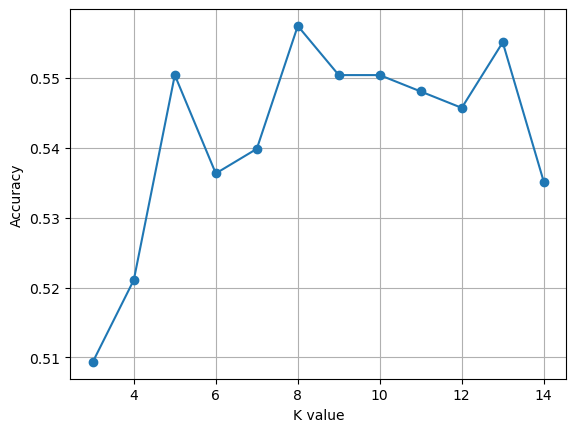

In [172]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [173]:
classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
model=classifier.fit(x_train,y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test,y_pred)

In [174]:
print('Accuracy :',accuracy_score(y_test,y_pred))

Accuracy : 0.5351288056206089


## 5. Gradient Boosting

In [175]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [176]:
y_pred_gb = gb.predict(x_test)
cm = confusion_matrix(y_test, y_pred_gb)
print(cm)
print('Accuracy is',accuracy_score(y_test, y_pred_gb))
print('Recall is',recall_score(y_test, y_pred_gb,average='micro'))
print('Precision is',precision_score(y_test, y_pred_gb,average='micro'))

[[ 94   3  13  12   1]
 [ 26  22  34  14   2]
 [ 29   5 107  43   4]
 [ 21   4  38 139  15]
 [ 23   2  28  33 142]]
Accuracy is 0.5901639344262295
Recall is 0.5901639344262295
Precision is 0.5901639344262295


## 6. Naive Bayes

In [177]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()
gn.fit(x_train,y_train)

GaussianNB()

In [178]:
y_pred_nb = gn.predict(x_test)
cm = confusion_matrix(y_test, y_pred_nb)
print(cm)
print('Accuracy is',accuracy_score(y_test, y_pred_nb))
print('Recall is',recall_score(y_test, y_pred_nb,average='micro'))
print('Precision is',precision_score(y_test, y_pred_nb,average='micro'))

[[  7 115   1   0   0]
 [  3  92   3   0   0]
 [  2 184   0   0   2]
 [  4 203   4   4   2]
 [  1 218   6   1   2]]
Accuracy is 0.12295081967213115
Recall is 0.12295081967213115
Precision is 0.12295081967213115


# Hyperparameter Tuning

In [179]:
gb=GradientBoostingClassifier(max_depth=3,n_estimators=73,learning_rate=0.1)
gb.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=73)

In [180]:
y_pred4 = gb.predict(x_test)
cm = confusion_matrix(y_test, y_pred4)
print(cm)
print('Accuracy is',accuracy_score(y_test, y_pred4))
print('Recall is',recall_score(y_test, y_pred4,average='micro'))
print('Precision is',precision_score(y_test, y_pred4,average='micro'))

[[ 95   3  12  12   1]
 [ 27  22  33  15   1]
 [ 30   5 105  45   3]
 [ 21   4  36 141  15]
 [ 24   2  28  33 141]]
Accuracy is 0.5901639344262295
Recall is 0.5901639344262295
Precision is 0.5901639344262295


# Conclusion

The best algorithm to fit the model is Gradient Boosting Algorithm. The algorithm classifies the side effects of drug based on age,sex,ease of use, satisfication.